#Пункт 1. Загрузка данных

In [317]:
!pip install -U matplotlib
!pip install phik

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [318]:
import pandas as pd
import numpy as np
# import random
# random.seed(42)
import phik

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

mpl.style.use('dark_background')

plt.style.use('default')

import os
from matplotlib.collections import PathCollection                             # для вывода непрозрачных меток легенды
from matplotlib.legend_handler import HandlerPathCollection, HandlerLine2D    # для вывода непрозрачных меток легенды
from itertools import chain                                                   # для преобразования списка списков в список

In [319]:
from sklearn.model_selection import train_test_split                                               # разделитель датасета 
from sklearn.linear_model import LogisticRegression                                                # логистическая регрессия
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score # метрики
from sklearn.ensemble import RandomForestClassifier                                                # случайный лес классификатор
from sklearn.preprocessing import StandardScaler                                                   # стандартизация
from scipy.cluster.hierarchy import dendrogram, linkage                                            # дендрограмма
from sklearn.cluster import KMeans                                                                 # кластеризация
from sklearn.metrics import silhouette_score                                                       # метрика силуэта

In [320]:
# p = 'https://raw.githubusercontent.com/curiousily/Customer-Churn-Detection-with-TensorFlow-js/master/src/data/customer-churn.csv'
# df = pd.read_csv(p)
# df.to_csv('customer-churn.csv', index=False)

https://drive.google.com/file/d/1FIt3aCVHK4BM3u-p9JPsArGa4GXCBrDG/view?usp=sharing

In [321]:
!gdown 1FIt3aCVHK4BM3u-p9JPsArGa4GXCBrDG

Downloading...
From: https://drive.google.com/uc?id=1FIt3aCVHK4BM3u-p9JPsArGa4GXCBrDG
To: /content/customer-churn.csv
100% 971k/971k [00:00<00:00, 114MB/s]


In [322]:
df = pd.read_csv('/content/customer-churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [323]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

Расшифровка названий столбцов
*   customerID: идентификатор клиента
*   Gender: является ли клиент мужчиной или женщиной
*   SeniorCitizen: является ли клиент пожилым гражданином (да, нет)
*   Partner: есть ли у клиента партнер (да, нет)
*   Dependents: есть ли у клиента иждивенцы (да, нет)
*   Tenure: количество месяцев, в течение которых клиент оставался в компании
*   PhoneService: есть ли у клиента телефония (да, нет)
*   MultipleLines: есть ли у клиента несколько линий (да, нет, нет телефонии)
*   InternetService: интернет-провайдер клиента (DSL, оптоволокно, нет)
*   OnlineSecurity: есть ли у клиента онлайн-безопасность (да, нет, нет интернет-сервиса)
*   OnlineBackup: есть ли у клиента онлайн-резервное копирование (да, нет, нет интернет-сервиса)
*   DeviceProtection: есть ли у клиента защита устройства (да, нет, нет интернет-сервиса)
*   TechSupport: есть ли у клиента техническая поддержка (да, нет, нет интернет-сервиса)
*   StreamingTV: есть ли у клиента потоковое телевидение (да, нет, нет интернет-сервиса)
*   StreamingMovies: есть ли у клиента потоковые фильмы (да, нет, нет интернет-сервиса)
*   Contract: срок контракта клиента (ежемесячно, один год, два года)
*   PaperlessBilling: есть ли у клиента безбумажный биллинг (да, нет)
*   PaymentMethod: способ оплаты клиента (электронный чек, чек по почте, автоматический банковский перевод, автоплатеж с карты)
*   MonthlyCharges: сумма, взимаемая с клиента ежемесячно
*   TotalCharges: общая сумма, списанная с клиента
*   Churn: ушел ли клиент или нет (да или нет)

In [324]:
#Проверим пропуски

df.isna().mean().sort_values(ascending=False)


customerID          0.0
DeviceProtection    0.0
TotalCharges        0.0
MonthlyCharges      0.0
PaymentMethod       0.0
PaperlessBilling    0.0
Contract            0.0
StreamingMovies     0.0
StreamingTV         0.0
TechSupport         0.0
OnlineBackup        0.0
gender              0.0
OnlineSecurity      0.0
InternetService     0.0
MultipleLines       0.0
PhoneService        0.0
tenure              0.0
Dependents          0.0
Partner             0.0
SeniorCitizen       0.0
Churn               0.0
dtype: float64

In [325]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [326]:
def lower_my_s(s):
  s1 = ''
  f = 0
  for i in range( len(s)):
    if (s[i].isupper()) and (f<1) and i!= 0:
      s1 += '_' + s[i].lower()
      f += 1
    else:
      s1 += s[i].lower()
  # s1 = s1.strip('_')
  return s1

l = df.columns

d = dict(zip(l,[lower_my_s(str(i)) for i in l]))
d

{'customerID': 'customer_id',
 'gender': 'gender',
 'SeniorCitizen': 'senior_citizen',
 'Partner': 'partner',
 'Dependents': 'dependents',
 'tenure': 'tenure',
 'PhoneService': 'phone_service',
 'MultipleLines': 'multiple_lines',
 'InternetService': 'internet_service',
 'OnlineSecurity': 'online_security',
 'OnlineBackup': 'online_backup',
 'DeviceProtection': 'device_protection',
 'TechSupport': 'tech_support',
 'StreamingTV': 'streaming_tv',
 'StreamingMovies': 'streaming_movies',
 'Contract': 'contract',
 'PaperlessBilling': 'paperless_billing',
 'PaymentMethod': 'payment_method',
 'MonthlyCharges': 'monthly_charges',
 'TotalCharges': 'total_charges',
 'Churn': 'churn'}

In [327]:
df = df.rename(columns = d)
df.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,online_security,...,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges,churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [328]:
df[['internet_service','online_security']].groupby('online_security').count().reset_index().iloc[1,1]

1526

In [329]:
df['gender'] = df.apply(lambda x: 1 if x['gender'] =='Female' else 0 ,axis=1)
df['senior_citizen'] = df['senior_citizen'].astype(int)
df['partner'] = df.apply(lambda x: 1 if x['partner'] =='Yes' else 0 ,axis=1)
df['dependents'] = df.apply(lambda x: 1 if x['dependents'] =='Yes' else 0 ,axis=1)
df['phone_service'] = df.apply(lambda x: 1 if x['phone_service'] =='Yes' else 0 ,axis=1)
df['multiple_lines'] = df['multiple_lines'].apply(lambda x: 'No_service' if 'service' in x else x)

df['online_security'] = df['online_security'].apply(lambda x: 'No_service' if 'service' in x else x)
df['online_backup'] = df['online_backup'].apply(lambda x: 'No_service' if 'service' in x else x)
df['device_protection'] = df['device_protection'].apply(lambda x: 'No_service' if 'service' in x else x)
df['tech_support'] = df['tech_support'].apply(lambda x: 'No_service' if 'service' in x else x)
df['streaming_tv'] = df['streaming_tv'].apply(lambda x: 'No_service' if 'service' in x else x)
df['streaming_movies'] = df['streaming_movies'].apply(lambda x: 'No_service' if 'service' in x else x)

df['paperless_billing'] = df.apply(lambda x: 1 if x['paperless_billing'] =='Yes' else 0 ,axis=1)
df['monthly_charges'] = df['monthly_charges'].astype(float)
df['total_charges'] = pd.to_numeric(df['total_charges'], errors='coerce')
df['churn'] = df.apply(lambda x: 1 if x['churn'] =='Yes' else 0 ,axis=1)

df.dtypes

customer_id           object
gender                 int64
senior_citizen         int64
partner                int64
dependents             int64
tenure                 int64
phone_service          int64
multiple_lines        object
internet_service      object
online_security       object
online_backup         object
device_protection     object
tech_support          object
streaming_tv          object
streaming_movies      object
contract              object
paperless_billing      int64
payment_method        object
monthly_charges      float64
total_charges        float64
churn                  int64
dtype: object

In [330]:
columns_dont_want = ['customer_id', 'gender', 'senior_citizen','partner',
                     'dependents','tenure','phone_service','multiple_lines','online_security','online_backup',
                     'device_protection','tech_support','streaming_tv',
                     'streaming_movies','contract','paperless_billing']
select = [x for x in df.columns if x not in columns_dont_want]
df.loc[:, select].head()

,internet_service,payment_method,monthly_charges,total_charges,churn
0,DSL,Electronic check,29.85,29.85,0
1,DSL,Mailed check,56.95,1889.50,0
2,DSL,Mailed check,53.85,108.15,1
3,DSL,Bank transfer (automatic),42.30,1840.75,0
4,Fiber optic,Electronic check,70.70,151.65,1


In [331]:
df[['contract']].nunique()
df[['partner']].nunique()

partner    2
dtype: int64

In [332]:
#Проверим датасет на полные дубликаты.
df.duplicated().sum()

0

In [333]:
df[['total_charges']].nunique()[0]

6530

In [334]:
df.dropna(inplace=True )

In [335]:
df.isna().mean().sort_values(ascending=False)

customer_id          0.0
device_protection    0.0
total_charges        0.0
monthly_charges      0.0
payment_method       0.0
paperless_billing    0.0
contract             0.0
streaming_movies     0.0
streaming_tv         0.0
tech_support         0.0
online_backup        0.0
gender               0.0
online_security      0.0
internet_service     0.0
multiple_lines       0.0
phone_service        0.0
tenure               0.0
dependents           0.0
partner              0.0
senior_citizen       0.0
churn                0.0
dtype: float64

#Пункт 2. Исследовательский анализ данных (EDA)

##2.1 Изучение describe датасета

In [336]:
select = [x for x in df.columns if df[[x]].nunique()[0] >10]
select

['customer_id', 'tenure', 'monthly_charges', 'total_charges']

In [337]:
#Посмотрим на распрделение в колонках с не бинарного характера
select = [x for x in df.columns if df[[x]].nunique()[0] >2]
df.loc[:, select].describe()

,tenure,monthly_charges,total_charges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


<AxesSubplot:>

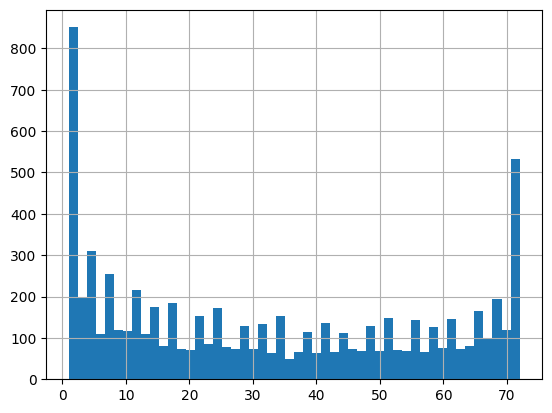

In [338]:
df['tenure'].hist(bins = 50)

<AxesSubplot:xlabel='tenure', ylabel='Count'>

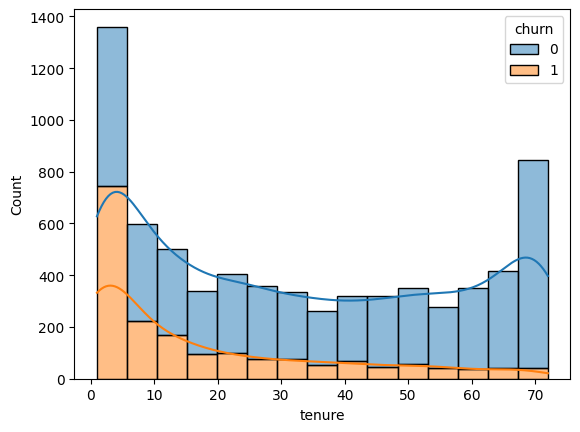

In [339]:
sns.histplot(data=df, x="tenure", hue="churn", kde=True, multiple="stack")

In [340]:
len(df.loc[df['tenure'] == 0])

0

Всего 11 человек с компанией меньше месяца

<AxesSubplot:>

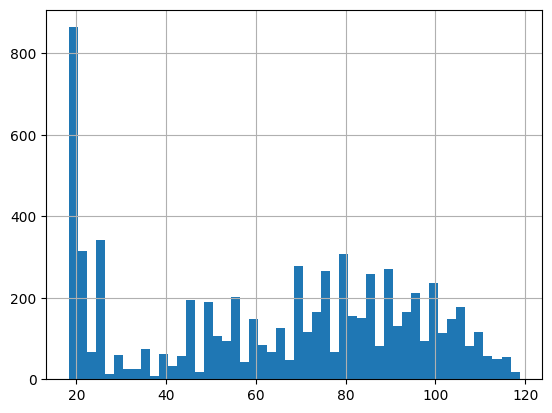

In [341]:
df['monthly_charges'].hist(bins = 50)

<AxesSubplot:xlabel='monthly_charges', ylabel='Count'>

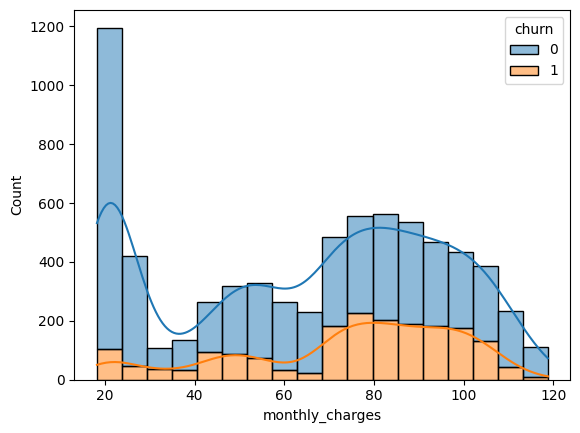

In [342]:
sns.histplot(data=df, x="monthly_charges", hue="churn", kde=True, multiple="stack")

In [343]:
len(df.loc[df['monthly_charges'] == 0])
# Все из клиентов имеют ежемесячный платеж

0

<AxesSubplot:>

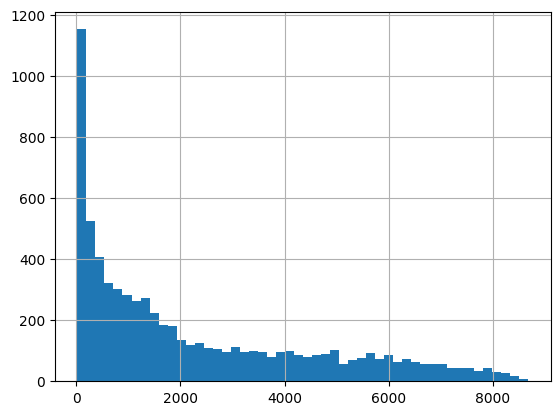

In [344]:
df['total_charges'].hist(bins = 50)

<AxesSubplot:xlabel='total_charges', ylabel='Count'>

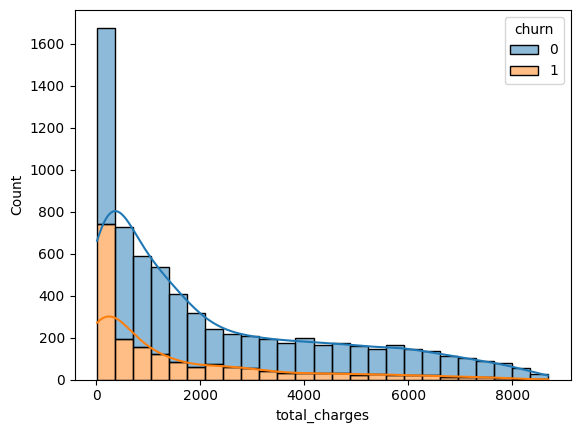

In [345]:
sns.histplot(data=df, x="total_charges", hue="churn", kde=True, multiple="stack")

In [346]:
len(df.loc[df['total_charges'] == 0])
#Те клиенты которые пришли в этом месяце уже внесли платеж

0

In [347]:
#как записана графа отток (churn) для клиентов которые только пришли
len(df.loc[(df['total_charges'] == 0) & df['churn'] == 1])
#Записывается как "живой клиент"

0

###Информация по количественным переменным
*   По колонке tenure наблюдается почти бинарное распределение с большими выбросами в районе 0 и 72.
*   По колонке monthly_charges наблюдается "двойное распределение" с большим выбросом на значении 19-20.
*   По колонке total_charges наблюдается перекошенное распределение.

In [348]:
df[['partner']].nunique()

partner    2
dtype: int64

In [349]:
#Посмотрим на распрделение в колонках с не бинарного характера
select_columns_2 = [x for x in df.columns if df[[x]].nunique()[0] <= 2]
df.loc[:, select_columns_2].describe()

,gender,senior_citizen,partner,dependents,phone_service,paperless_billing,churn
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.495307,0.162400,0.482509,0.298493,0.903299,0.592719,0.265785
std,0.500014,0.368844,0.499729,0.457629,0.295571,0.491363,0.441782
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


###Информация по качественным переменным
*   По колонке gender - почти одинаковое количество женщин и мужчин в выборке
*   По колонке SeniorCitizen - большинство клиентов - молодые люди
*   По колонке Partner - у половины клиентов присутствует партнер (возможно женат/замужем)
*   По колонке Dependents - у 30% клиентов есть иждевенцы
*   По колонке PhoneService - у 90% клиентов есть сервис на телефоне (или же есть телефон)
*   По колонке PaperlessBilling - 60% клиентов присутсвует безбумажный биллинг
*   По колонке Churn - 27% клиентов уже ушли

In [350]:
t = pd.DataFrame(df['internet_service'].value_counts())
list(t['internet_service'])

[3096, 2416, 1520]

In [351]:
#Посмотрим на распрделение в колонках троичного характера
t = pd.DataFrame(df['internet_service'].value_counts())
select_columns_3 = [x for x in df.columns if df[[x]].nunique()[0] == 3 ]
for _ in select_columns_3[1:]:
  t[_] = list(pd.DataFrame(df[_].value_counts())[_])
t

,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract
Fiber optic,3096,3497,3087,3094,3472,2809,2781,3875
DSL,2416,2015,2425,2418,2040,2703,2731,1685
No,1520,1520,1520,1520,1520,1520,1520,1472


In [352]:
#ОБнаруждена колонка с 4 типами
df[['payment_method']].groupby('payment_method').count()

""
payment_method
Bank transfer (automatic)
Credit card (automatic)
Electronic check
Mailed check


In [353]:
def univariate_multi_plot(df=df,colums =df.columns):
    fig, ax = plt.subplots(len(colums),1, figsize=(5, 20))
    for i in range(len(colums)):
      df[colums[i]].value_counts(ascending=True).plot(kind="pie",autopct="%1.1f%%", ax=ax[i])
    plt.show()

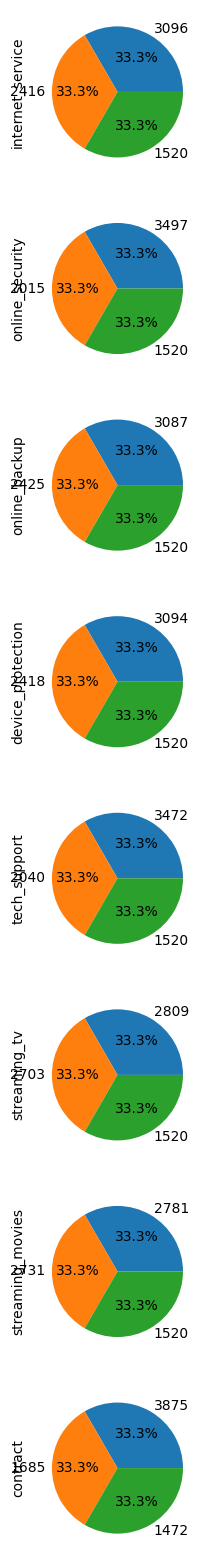

In [354]:
l = t.columns
univariate_multi_plot(df = t,colums = l )

Забавно, что ровно по 1/3 доли в каджом секторе

##2.2 Изучение датасета по зависимой переменной


In [355]:
pd.get_dummies(df, columns=select_columns_3).head().columns

Index(['customer_id', 'gender', 'senior_citizen', 'partner', 'dependents',
       'tenure', 'phone_service', 'paperless_billing', 'payment_method',
       'monthly_charges', 'total_charges', 'churn', 'multiple_lines_No',
       'multiple_lines_No_service', 'multiple_lines_Yes',
       'internet_service_DSL', 'internet_service_Fiber optic',
       'internet_service_No', 'online_security_No',
       'online_security_No_service', 'online_security_Yes', 'online_backup_No',
       'online_backup_No_service', 'online_backup_Yes', 'device_protection_No',
       'device_protection_No_service', 'device_protection_Yes',
       'tech_support_No', 'tech_support_No_service', 'tech_support_Yes',
       'streaming_tv_No', 'streaming_tv_No_service', 'streaming_tv_Yes',
       'streaming_movies_No', 'streaming_movies_No_service',
       'streaming_movies_Yes', 'contract_Month-to-month', 'contract_One year',
       'contract_Two year'],
      dtype='object')

In [356]:
def znacheniya_hist(t, col1):
  tt = []
  tt.append( t.groupby(col1).count().reset_index().iloc[0,1]/ len(t) )
  tt.append( t.groupby(col1).count().reset_index().iloc[1,1]/ len(t) )
  tt.append( t.groupby(col1).count().reset_index().iloc[2,1]/ len(t) )
  return tt

In [357]:
# def churn_hist(col, y, bins):
#     t0 = df.query(f'{y} == 0')
#     t1 = df.query(f'{y} == 1')
#     plt.hist([t0[col], t1[col]], label=[f'{y} = 0', f'{y} = 1'], bins = bins)
#     plt.xlabel(col, fontsize=16)
#     plt.ylabel('clients count', fontsize=16)
#     if bins == 2:
#       r = abs(round(t0[col].mean()*100 - t1[col].mean()*100, 2))
#       plt.title(f'{col}_разница_{r}%', fontsize=12)
#     elif bins == 3:
#       r1 = abs(round((znacheniya_hist(t = t0, col1 = col)[0] - znacheniya_hist(t = t1, col1 = col)[0])*100))
#       r2 = abs(round((znacheniya_hist(t = t0, col1 = col)[1] - znacheniya_hist(t = t1, col1 = col)[1])*100))
#       r3 = abs(round((znacheniya_hist(t = t0, col1 = col)[2] - znacheniya_hist(t = t1, col1 = col)[2])*100))
#       plt.title(f'{col}_проценты_{r1}%_{r2}%_{r3}%', fontsize=12)
#     else:
#       plt.title(f'{col}', fontsize=12)

#     for index, value in enumerate(t0[col]):
#         label = format(int(value), ',')
#         plt.annotate(col, xy=(value-300, index-0.1), color='white')
#     plt.legend()
#     plt.show()

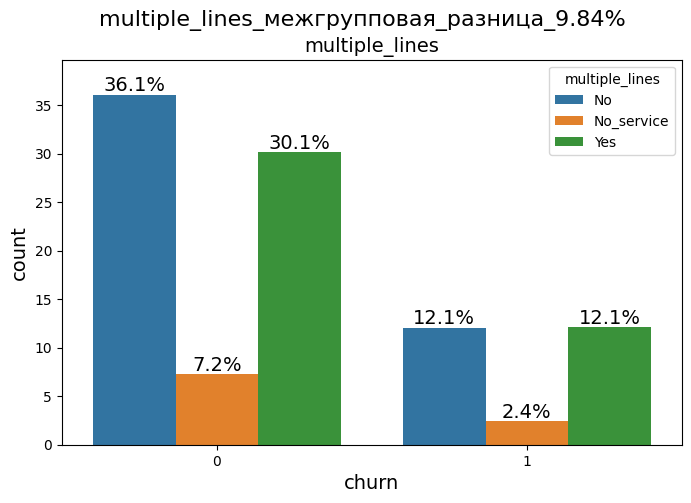

In [358]:
col = 'multiple_lines'
y = 'churn'
def churn_hist(col, y):
    g_v = df.groupby(['churn',col], as_index= False).count().reset_index()
    fig, ax = plt.subplots(figsize=(8, 5))
    ax = sns.barplot(x='churn', y= round(g_v.iloc[:,4]/g_v.iloc[:,4].sum()*100,2),
                    hue = col, data=g_v,
                    errwidth=0)
    for i in ax.containers:
        ax.bar_label(i, size=14,fmt='%1.1f%%')
        ax.margins(y=0.1)
    ar = list(g_v.iloc[:,4])
    ar1 = ar[:int(len(ar)/2)]
    ar2 = ar[int(len(ar)/2):]
    ar1_t = np.array(ar1)/ar1[-1]
    ar2_t = np.array(ar2)/ar2[-1]
    r = round(abs(ar1_t.sum() - ar2_t.sum())/max(ar1_t.sum(),ar2_t.sum())*100,2)
    ax.set_title(col, size=14)
    ax.set_xlabel(y, size=14)
    ax.set_ylabel('count', size=14)
    fig.suptitle(f'{col}_межгрупповая_разница_{r}%', fontsize=16)

churn_hist(col, y)

In [359]:
g_v = df.groupby(['churn','multiple_lines'], as_index= False).count().reset_index()
t = np.array(round(g_v.iloc[:,4]/g_v.iloc[:,4].sum()*100,2))
t

array([36.06,  7.25, 30.11, 12.07,  2.42, 12.09])

In [360]:
from tqdm.auto import tqdm

In [361]:
select_columns_2

['gender',
 'senior_citizen',
 'partner',
 'dependents',
 'phone_service',
 'paperless_billing',
 'churn']

  0%|          | 0/6 [00:00<?, ?it/s]

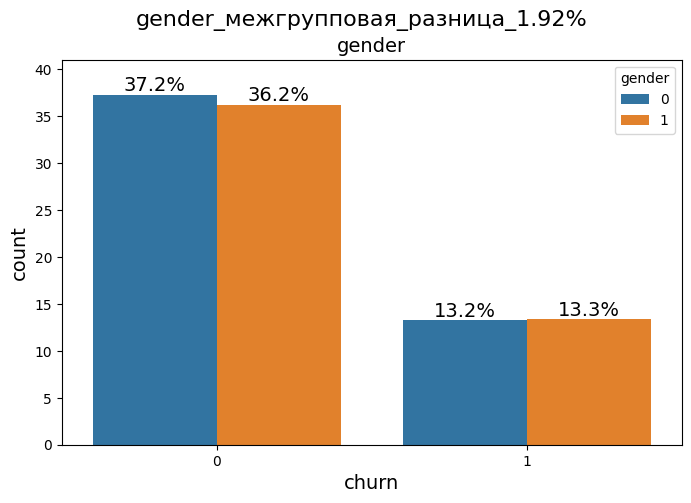

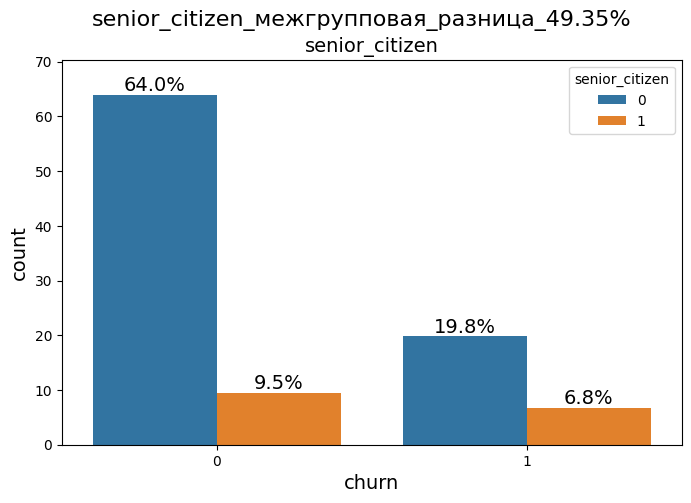

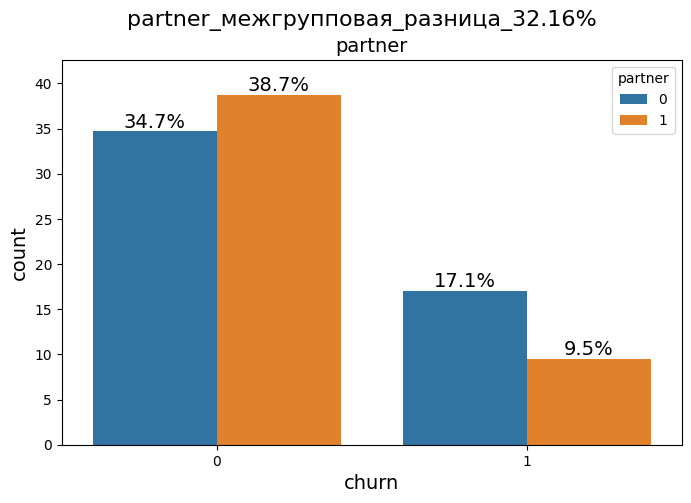

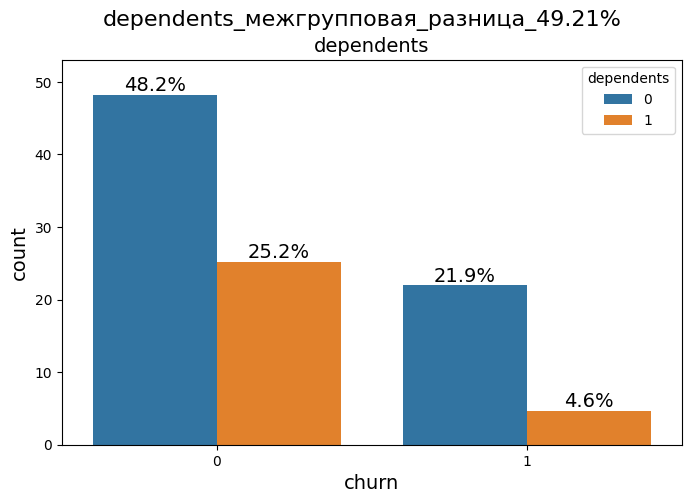

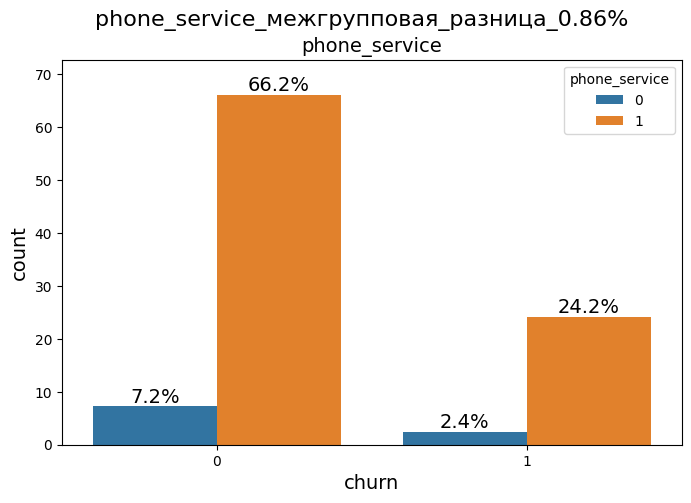

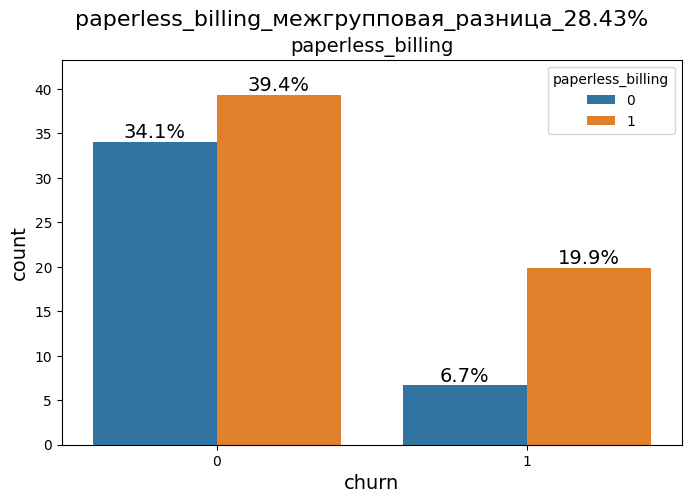

In [362]:
for col in tqdm(select_columns_2[:-1]):
    y = 'churn'
    churn_hist(col, y)

###Информация по качественным бинарным переменным

*   По колонке Gender: 2% = соотношение практически идентичное
*   По колонке SeniorCitizen: 50% = соотношение оимеет отличие - в группе оттока равное количество "старых" и "молодых" клиентов, в действующих клиентах = "молодых" больше
*   По колонке Partner: 32% = соотношение по наличию партнера имеет отличие по вычисленному показателю получается что те кто имеет партнера меньше склонны к оттоку
*   По колонке Dependents: 50% = соотношение оимеет отличие по вычисленному показателю = при этом наблюдается сходство с группировкой по Partner = в группе оттока гараздо меньше соотношение людей у которых есть иждевенец (кто в браке у того и дети)
*   По колонке PhoneService: 0.88% = соотношение практически идентичное
*   По колонке PaperlessBilling: 28,5% = соотношение имеет отличие по вычисленному показателю = в группе оттока значительная часть тех у кого есть PaperlessBilling

In [363]:
select_columns_3

['multiple_lines',
 'internet_service',
 'online_security',
 'online_backup',
 'device_protection',
 'tech_support',
 'streaming_tv',
 'streaming_movies',
 'contract']

  0%|          | 0/9 [00:00<?, ?it/s]

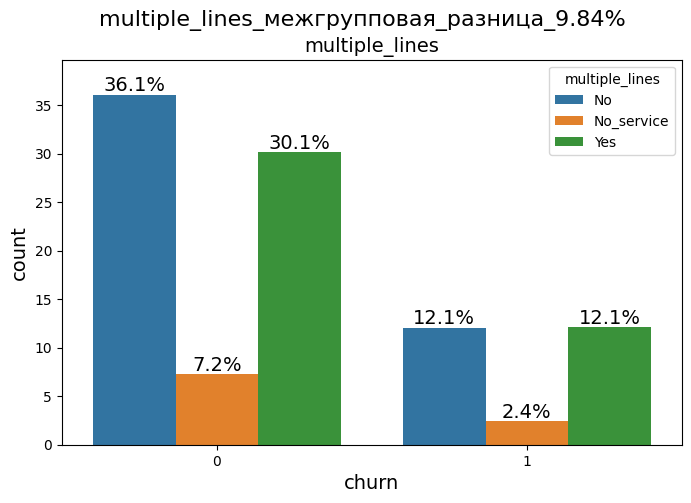

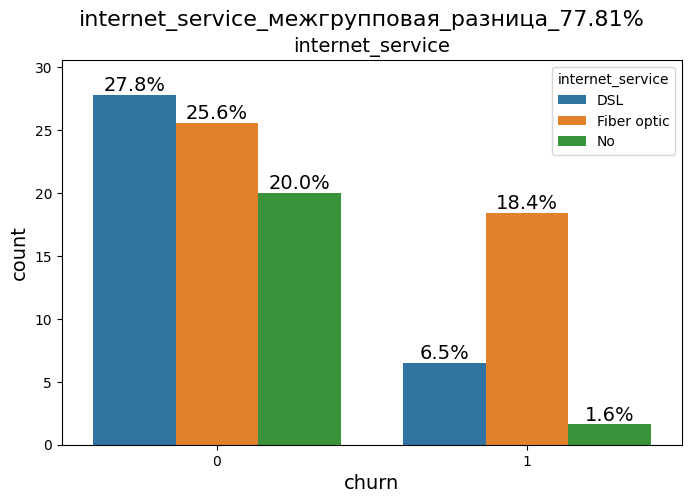

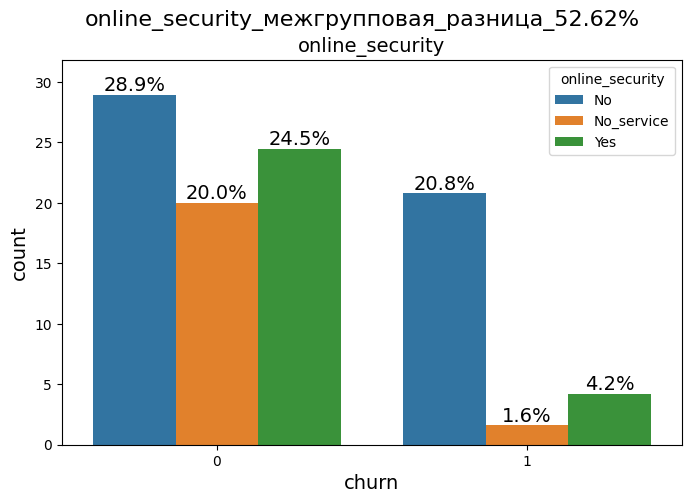

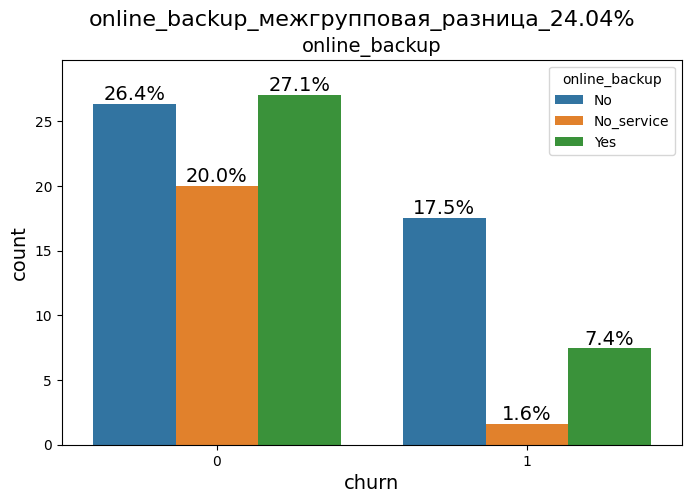

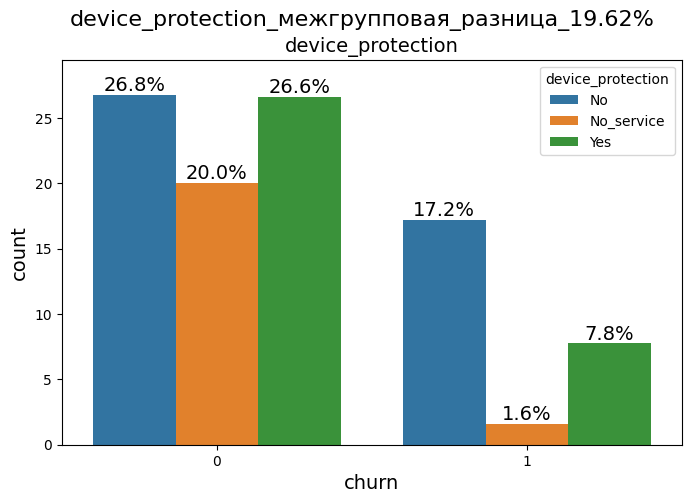

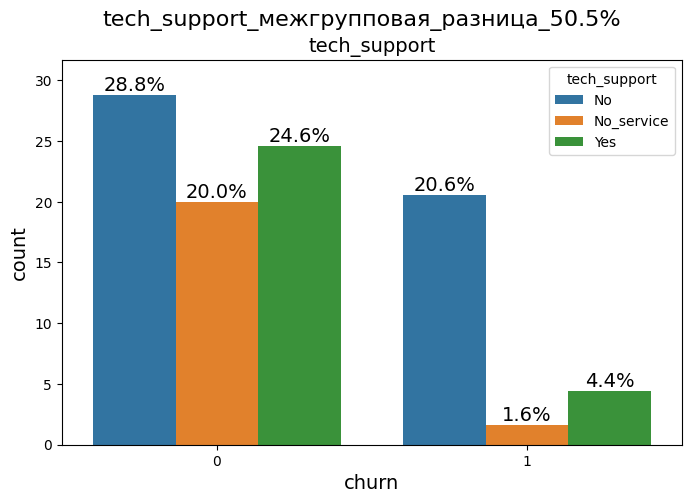

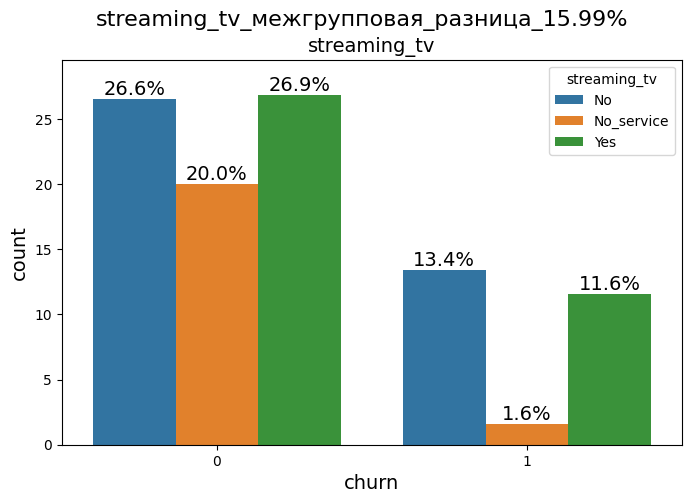

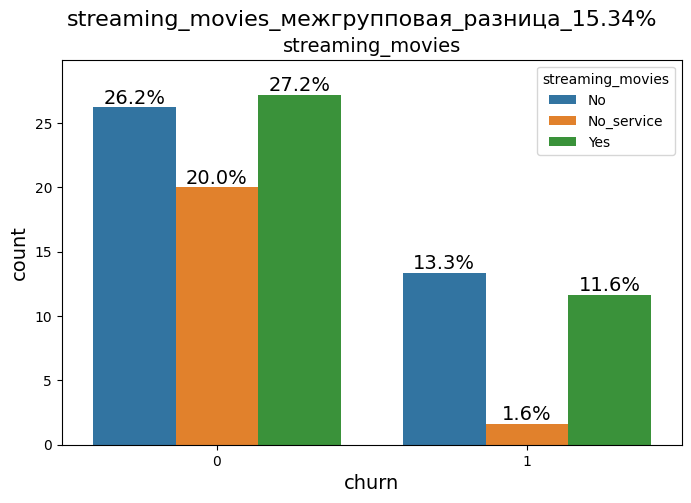

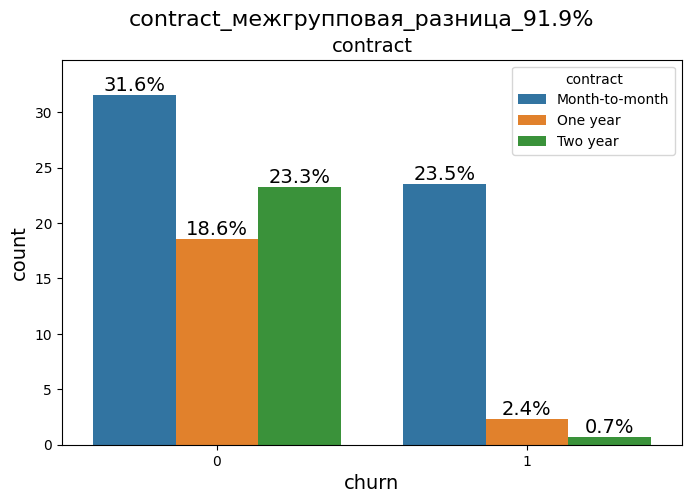

In [364]:
for col in tqdm(select_columns_3):
    y = 'churn'
    churn_hist(col, y)

###Информация по качественным троичным переменным
*   По колонке MultipleLines: 10% = соотношение не имеет существенных отличий - в группе оттока примерно равное по соотношению клиентов с разным количеством телефонов
*   По колонке InternetService: 78% = соотношение имеет отличия - в группе оттока "оптоволокно" наибольшее по соотношению - возможно с оптоволокном какие-то проблемы
*   По колонке OnlineSecurity: 53% = соотношение имеет отличия - если у клиента есть защита данных он уходит реже
*   По колонке OnlineBackup: 24% = соотношение имеет отличия - если у клиента есть онлайн-резервное копирование он уходит реже
*   По колонке DeviceProtection: 20% = соотношение имеет отличия - если у клиента есть защита устройства он уходит реже
*   По колонке TechSupport: 51% = соотношение имеет отличия - если у клиента есть техническая поддержка он уходит реже
*   По колонке StreamingTV: 15% = соотношение имеет отличия - если у клиента есть потоковое телевидение он уходит чуть чуть реже
*   По колонке StreamingMovies: 15% = соотношение имеет отличия - если у клиента есть потоковые фильмы он уходит чуть чуть реже (если есть фильмы то и телевидение есть)
*   По колонке Contract: 92% = соотношение имеет отличия - те к кого длительные контракты тот меньше уходит или что вероятней при сроке контракта клиенту не выгодно уходить до истечения сроке

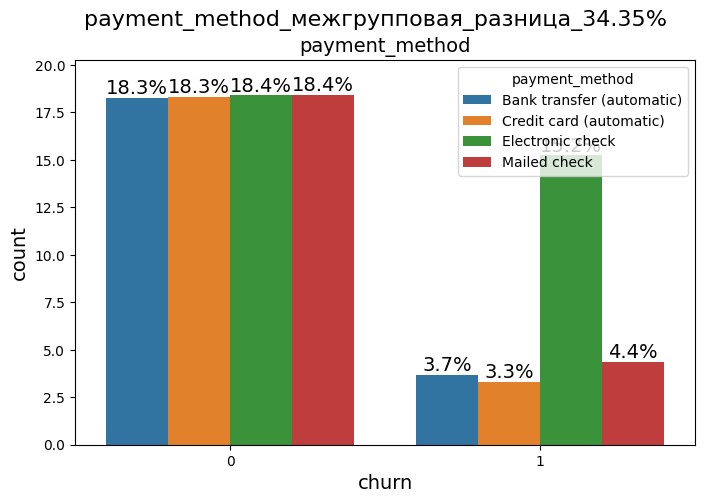

In [365]:
y = 'churn'
col = 'payment_method'
churn_hist(col, y)

###Информация по payment_method
Клиенты у которых метод оплаты "Electronic check" склонны к оттоку

  0%|          | 0/3 [00:00<?, ?it/s]

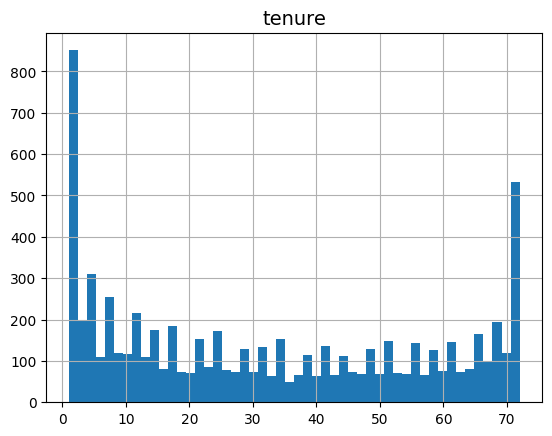

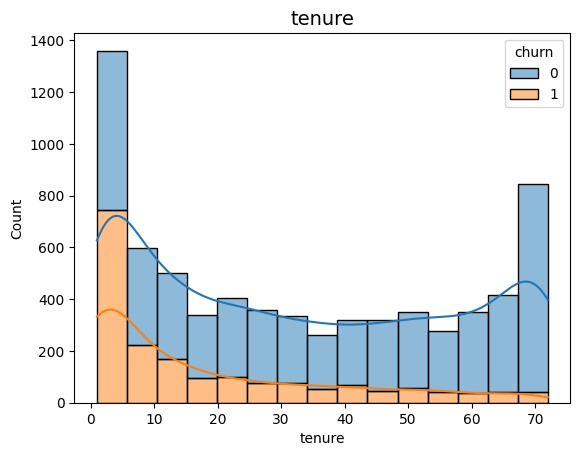

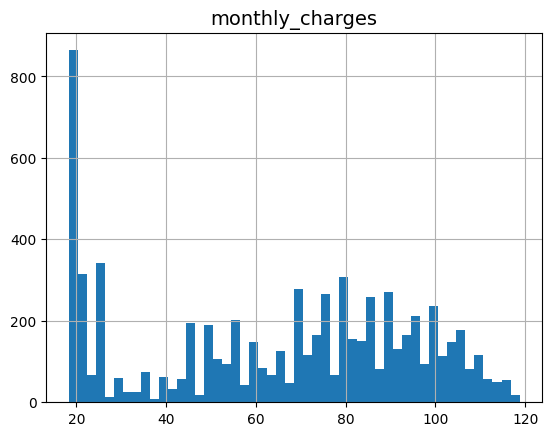

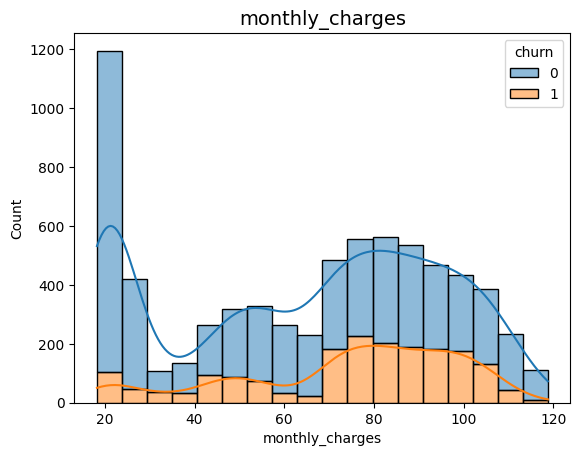

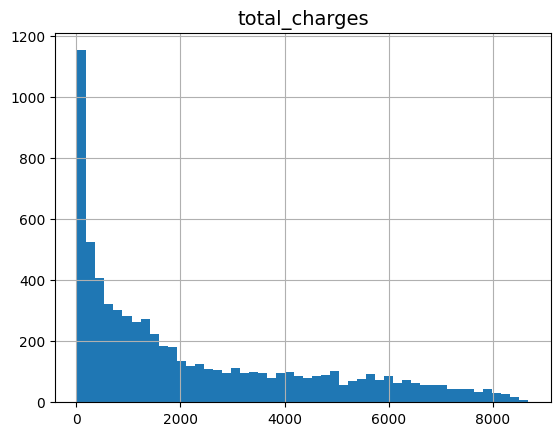

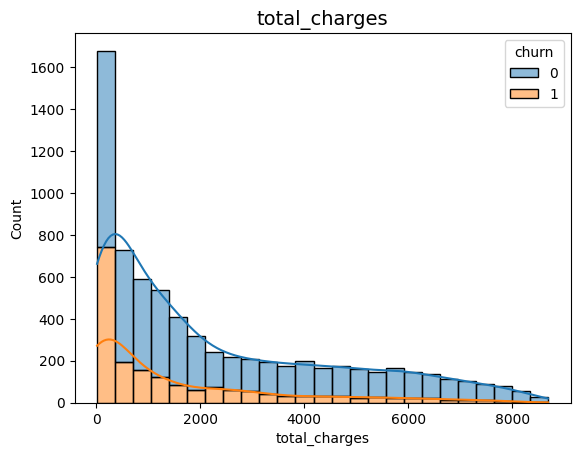

In [366]:
for col in tqdm(['tenure', 'monthly_charges', 'total_charges']):
    y = 'churn'
    df[col].hist(bins = 50).set_title(col, size=14)
    plt.show()

    sns.histplot(data=df, x=col, hue=y, kde=True, multiple="stack").set_title(col, size=14)
    plt.show()


###Информация по количественным переменным

*   Tenure: если месяцев мало то отток вероятнее
*   MonthlyCharges: всплеск соотношения отточных клиентов в цене 80
*   TotalCharges: Клиенты заплатившие меньше оттекают чаще

In [367]:
df.groupby('churn').mean().round(3).reset_index()

,churn,gender,senior_citizen,partner,dependents,tenure,phone_service,paperless_billing,monthly_charges,total_charges
0,0,0.493,0.129,0.528,0.343,37.650,0.901,0.536,61.307,2555.344
1,1,0.502,0.255,0.358,0.174,17.979,0.909,0.749,74.441,1531.796


Практически одинаковые средние значения мы наблюдаем по признакам gender и dependents. Меньше отток среди тех, кто:

*   SeniorCitizen: клиент пожилой гражданин
*   Partner: есть ли у клиента партнер (да, нет)
*   PaperlessBilling: клиент имеет безбумажный биллинг
*   MonthlyCharges: клиент платит меньше
*   TotalCharges: клиент уже много заплатил компании

In [368]:
for col in select_columns_3:
  print(df.pivot_table(index=col, values='churn').round(3).reset_index())
  print('________________')

  multiple_lines  churn
0             No  0.251
1     No_service  0.250
2            Yes  0.286
________________
  internet_service  churn
0              DSL  0.190
1      Fiber optic  0.419
2               No  0.074
________________
  online_security  churn
0              No  0.418
1      No_service  0.074
2             Yes  0.146
________________
  online_backup  churn
0            No  0.399
1    No_service  0.074
2           Yes  0.216
________________
  device_protection  churn
0                No  0.391
1        No_service  0.074
2               Yes  0.225
________________
  tech_support  churn
0           No  0.416
1   No_service  0.074
2          Yes  0.152
________________
  streaming_tv  churn
0           No  0.335
1   No_service  0.074
2          Yes  0.301
________________
  streaming_movies  churn
0               No  0.337
1       No_service  0.074
2              Yes  0.300
________________
         contract  churn
0  Month-to-month  0.427
1        One year  0.113
2        

##2.3 Матрицы корреляций

In [369]:
df.corr()

,gender,senior_citizen,partner,dependents,tenure,phone_service,paperless_billing,monthly_charges,total_charges,churn
gender,1.000000,0.001819,0.001379,-0.010349,-0.005285,0.007515,0.011902,0.013779,-0.000048,0.008545
senior_citizen,0.001819,1.000000,0.016957,-0.210550,0.015683,0.008392,0.156258,0.219874,0.102411,0.150541
partner,0.001379,0.016957,1.000000,0.452269,0.381912,0.018397,-0.013957,0.097825,0.319072,-0.149982
dependents,-0.010349,-0.210550,0.452269,1.000000,0.163386,-0.001078,-0.110131,-0.112343,0.064653,-0.163128
tenure,-0.005285,0.015683,0.381912,0.163386,1.000000,0.007877,0.004823,0.246862,0.825880,-0.354049
phone_service,0.007515,0.008392,0.018397,-0.001078,0.007877,1.000000,0.016696,0.248033,0.113008,0.011691
paperless_billing,0.011902,0.156258,-0.013957,-0.110131,0.004823,0.016696,1.000000,0.351930,0.157830,0.191454
monthly_charges,0.013779,0.219874,0.097825,-0.112343,0.246862,0.248033,0.351930,1.000000,0.651065,0.192858
total_charges,-0.000048,0.102411,0.319072,0.064653,0.825880,0.113008,0.157830,0.651065,1.000000,-0.199484
churn,0.008545,0.150541,-0.149982,-0.163128,-0.354049,0.011691,0.191454,0.192858,-0.199484,1.000000


<AxesSubplot:>

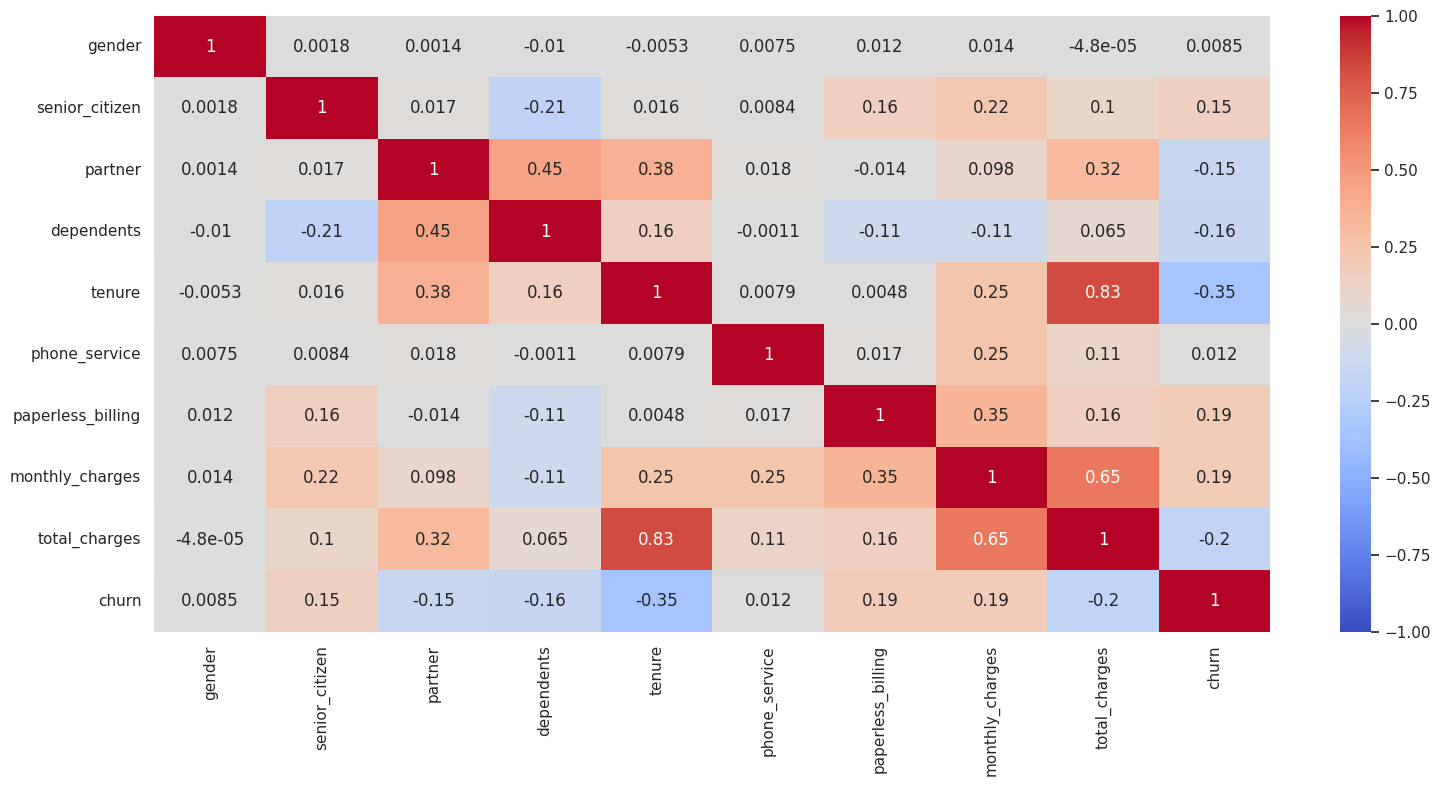

In [370]:
sns.set(rc = {'figure.figsize':(18,8)})
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm')

###Максимальные зависимости обнаружены:
*   Есть сильная корреляция (0,83) между столбцами tenure и total_charges бсолютно логично- чем больше клиент находится с компанией - тем больше общая 
сумма которую он заплатил за услуги компании
*   dependns и partner (0.45) логично у кто в браке у того есть дети в данном случае у 45 процентов людей в этой выборке которые в браке у них есть дети
*   monthly_charges и total_charges (0,65) понятно- что платеж за месяц просто умножается на количество месяцев проведенных с компанией

In [371]:
phik_overview = df.phik_matrix()
s = phik_overview['churn'].sort_values(ascending = False)
s.sort_values(ascending=False).index
s

interval columns not set, guessing: ['gender', 'senior_citizen', 'partner', 'dependents', 'tenure', 'phone_service', 'paperless_billing', 'monthly_charges', 'total_charges', 'churn']


/usr/local/lib/python3.7/dist-packages/phik/data_quality.py:62: UserWarning: The number of unique values of variable customer_id is large: 7032. Are you sure this is not an interval variable? Analysis for pairs of variables including customer_id can be slow.
  col, df[col].nunique()


customer_id          1.000000
churn                1.000000
tenure               0.473761
payment_method       0.448559
monthly_charges      0.359623
paperless_billing    0.295194
total_charges        0.280973
dependents           0.252268
contract             0.251283
senior_citizen       0.232897
partner              0.232215
online_security      0.211583
tech_support         0.208763
internet_service     0.195860
online_backup        0.177165
device_protection    0.170500
streaming_movies     0.139368
streaming_tv         0.139025
multiple_lines       0.021870
gender               0.000000
phone_service        0.000000
Name: churn, dtype: float64

<AxesSubplot:>

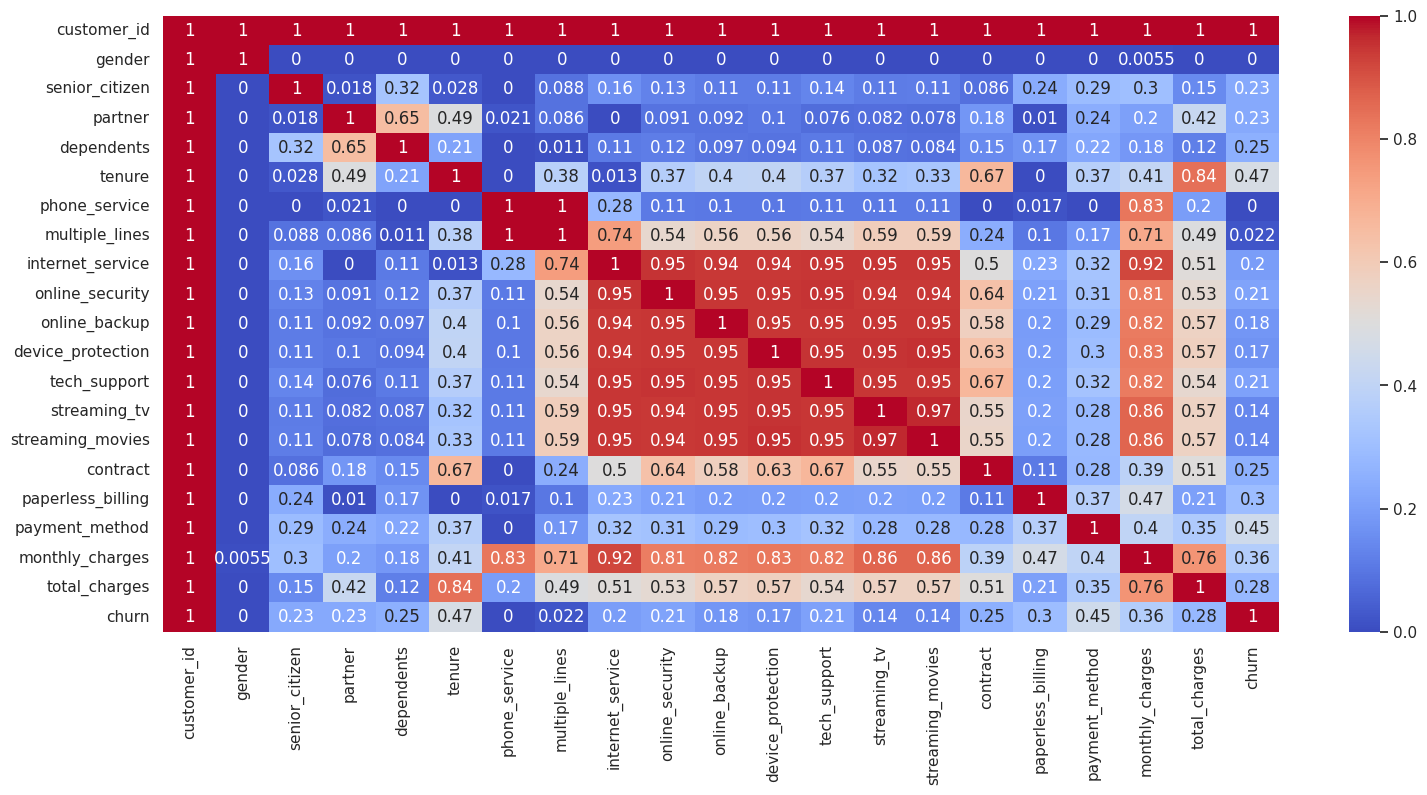

In [372]:
sns.set(rc = {'figure.figsize':(18,8)})
sns.heatmap(phik_overview, annot=True, vmin=0, vmax=1, center= 0.5, cmap= 'coolwarm')

<AxesSubplot:xlabel='index'>

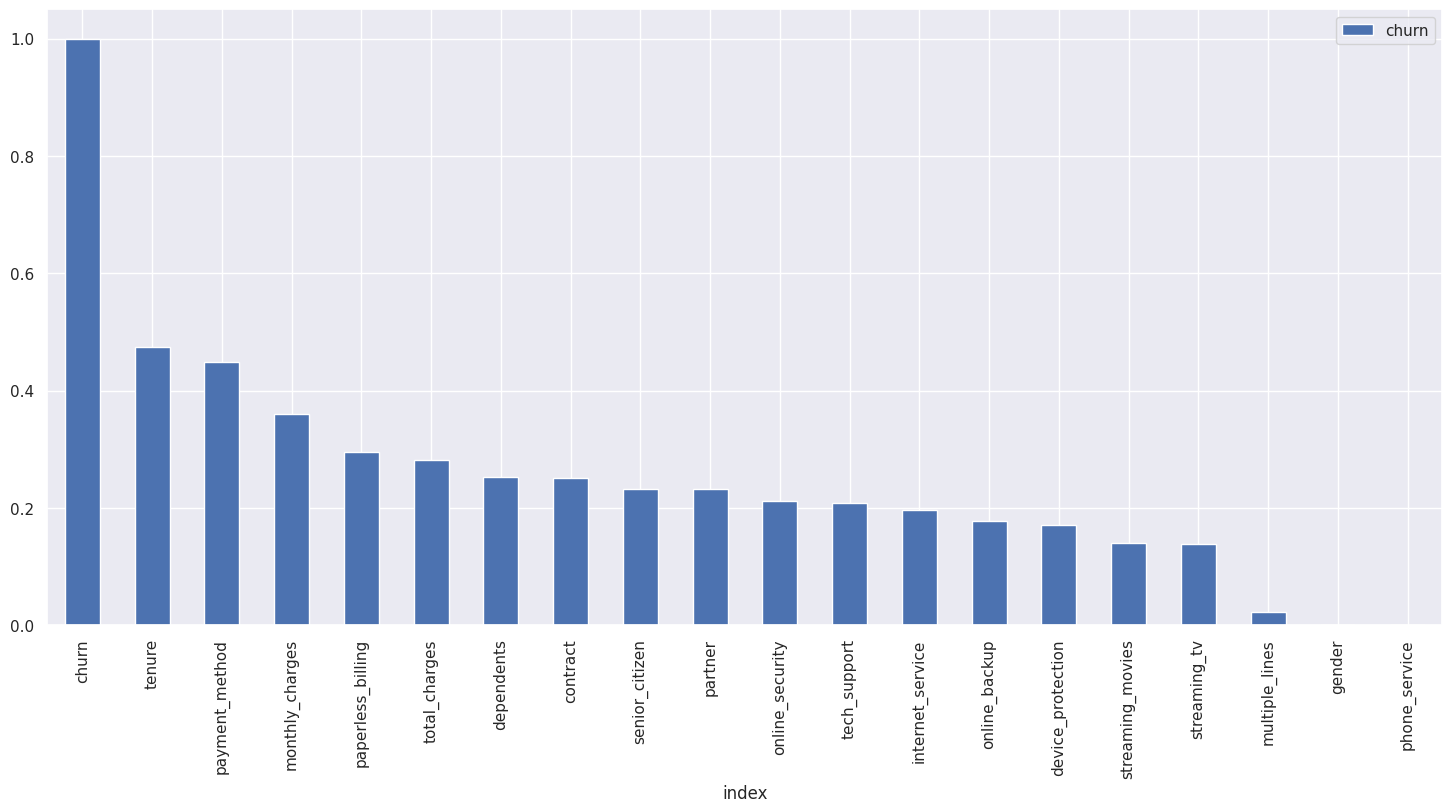

In [373]:
tt = pd.DataFrame(s)
tt['index'] = s.sort_values(ascending=False).index
tt[1:].plot(x='index',y='churn',kind='bar')

In [374]:
s

customer_id          1.000000
churn                1.000000
tenure               0.473761
payment_method       0.448559
monthly_charges      0.359623
paperless_billing    0.295194
total_charges        0.280973
dependents           0.252268
contract             0.251283
senior_citizen       0.232897
partner              0.232215
online_security      0.211583
tech_support         0.208763
internet_service     0.195860
online_backup        0.177165
device_protection    0.170500
streaming_movies     0.139368
streaming_tv         0.139025
multiple_lines       0.021870
gender               0.000000
phone_service        0.000000
Name: churn, dtype: float64

In [375]:
s.index[2:10]

Index(['tenure', 'payment_method', 'monthly_charges', 'paperless_billing',
       'total_charges', 'dependents', 'contract', 'senior_citizen'],
      dtype='object')

###Максимальные зависимости обнаружены у:

*   Tenure: если месяцев мало то отток вероятнее
*   MonthlyCharges: всплеск соотношения отточных клиентов в цене 80
*   TotalCharges: Клиенты заплатившие меньше оттекают чаще
*   tenure - количество месяцев, в течение которых клиент оставался в компании
*   payment_method - способ оплаты клиента (электронный чек, чек по почте, автоматический банковский перевод, автоплатеж с карты)
*   monthly_charges - сумма, взимаемая с клиента ежемесячно
*   paperless_billing - есть ли у клиента безбумажный биллинг (да, нет)


In [376]:
# data = df.columns[1:-1]
# pd.plotting.scatter_matrix(df, figsize=(15, 15),alpha=0.4)
# plt.show()

##2.4 Преобразование переменных к машинному обучению

In [377]:
ttt = select_columns_3
ttt.append('payment_method')
ttt

['multiple_lines',
 'internet_service',
 'online_security',
 'online_backup',
 'device_protection',
 'tech_support',
 'streaming_tv',
 'streaming_movies',
 'contract',
 'payment_method']

In [378]:
df_ob = pd.get_dummies(df, columns=ttt)
dd = [_.replace(' ', '_').replace('-', '_').replace('(', '_').replace(')', '_') for _ in df_ob.columns]

'churn' in dd

True

In [379]:
df_ob = df_ob.rename(columns = dict(zip(list(df_ob.columns), dd )))
df_ob.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,paperless_billing,monthly_charges,total_charges,...,streaming_movies_No,streaming_movies_No_service,streaming_movies_Yes,contract_Month_to_month,contract_One_year,contract_Two_year,payment_method_Bank_transfer__automatic_,payment_method_Credit_card__automatic_,payment_method_Electronic_check,payment_method_Mailed_check
0,7590-VHVEG,1,0,1,0,1,0,1,29.85,29.85,...,1,0,0,1,0,0,0,0,1,0
1,5575-GNVDE,0,0,0,0,34,1,0,56.95,1889.50,...,1,0,0,0,1,0,0,0,0,1
2,3668-QPYBK,0,0,0,0,2,1,1,53.85,108.15,...,1,0,0,1,0,0,0,0,0,1
3,7795-CFOCW,0,0,0,0,45,0,0,42.30,1840.75,...,1,0,0,0,1,0,1,0,0,0
4,9237-HQITU,1,0,0,0,2,1,1,70.70,151.65,...,1,0,0,1,0,0,0,0,1,0


In [380]:
'churn' in df_ob.columns

True

In [381]:
df_ob.columns

Index(['customer_id', 'gender', 'senior_citizen', 'partner', 'dependents',
       'tenure', 'phone_service', 'paperless_billing', 'monthly_charges',
       'total_charges', 'churn', 'multiple_lines_No',
       'multiple_lines_No_service', 'multiple_lines_Yes',
       'internet_service_DSL', 'internet_service_Fiber_optic',
       'internet_service_No', 'online_security_No',
       'online_security_No_service', 'online_security_Yes', 'online_backup_No',
       'online_backup_No_service', 'online_backup_Yes', 'device_protection_No',
       'device_protection_No_service', 'device_protection_Yes',
       'tech_support_No', 'tech_support_No_service', 'tech_support_Yes',
       'streaming_tv_No', 'streaming_tv_No_service', 'streaming_tv_Yes',
       'streaming_movies_No', 'streaming_movies_No_service',
       'streaming_movies_Yes', 'contract_Month_to_month', 'contract_One_year',
       'contract_Two_year', 'payment_method_Bank_transfer__automatic_',
       'payment_method_Credit_card__automa

In [382]:
df_ob['total_charges'].isna().sum()

0

In [383]:
# df_ob['total_charges']

In [384]:
df_ob.isna().mean().sort_values(ascending=False)

customer_id                                 0.0
streaming_tv_Yes                            0.0
device_protection_No                        0.0
device_protection_No_service                0.0
device_protection_Yes                       0.0
tech_support_No                             0.0
tech_support_No_service                     0.0
tech_support_Yes                            0.0
streaming_tv_No                             0.0
streaming_tv_No_service                     0.0
streaming_movies_No                         0.0
gender                                      0.0
streaming_movies_No_service                 0.0
streaming_movies_Yes                        0.0
contract_Month_to_month                     0.0
contract_One_year                           0.0
contract_Two_year                           0.0
payment_method_Bank_transfer__automatic_    0.0
payment_method_Credit_card__automatic_      0.0
payment_method_Electronic_check             0.0
online_backup_Yes                       

#Пункт 3. Модель прогнозирования оттока клиентов

##3.1 Разбиение датасета на выборки

<AxesSubplot:xlabel='churn', ylabel='Density'>

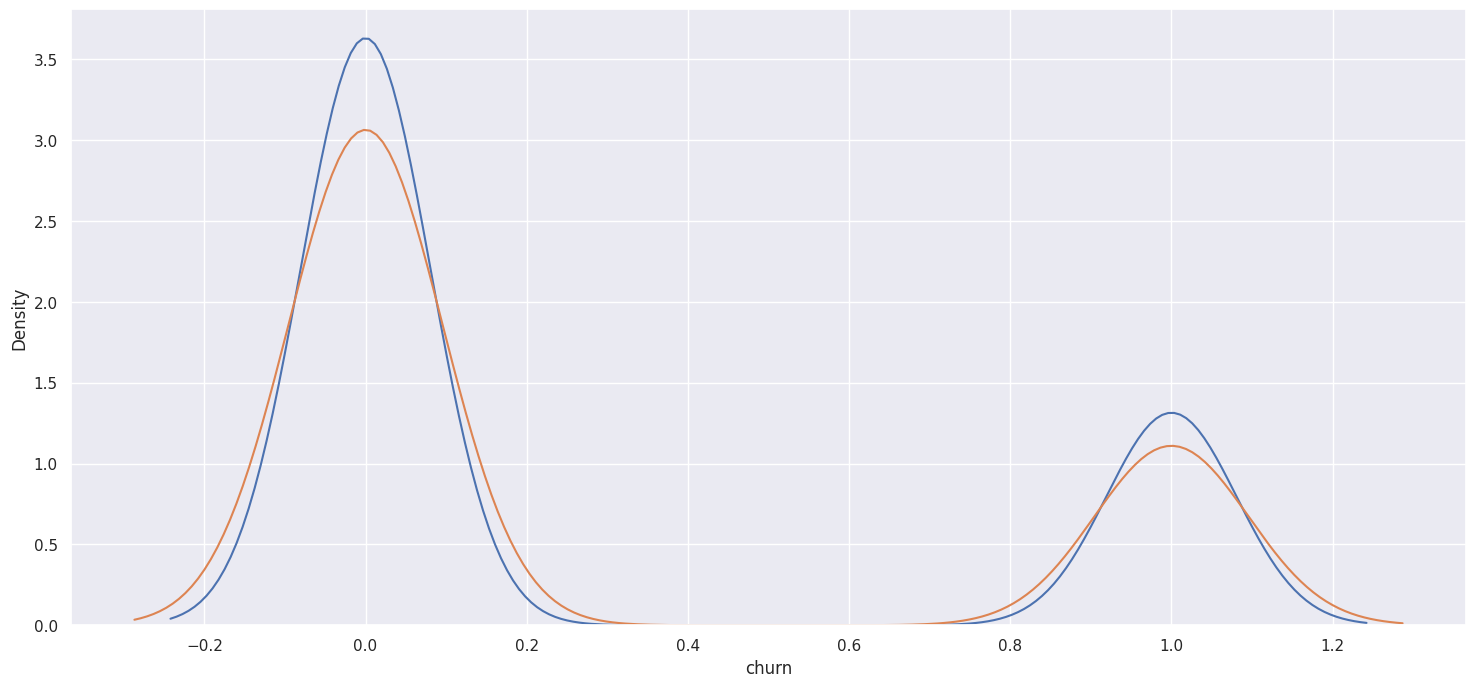

In [385]:
y = df_ob['churn']
X = df_ob[[_ for _ in df_ob.columns[1:] if _ not in ['customer_id','churn']]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42,stratify=y)

sns.kdeplot(y_train)
sns.kdeplot(y_test) 

In [386]:
X

,gender,senior_citizen,partner,dependents,tenure,phone_service,paperless_billing,monthly_charges,total_charges,multiple_lines_No,...,streaming_movies_No,streaming_movies_No_service,streaming_movies_Yes,contract_Month_to_month,contract_One_year,contract_Two_year,payment_method_Bank_transfer__automatic_,payment_method_Credit_card__automatic_,payment_method_Electronic_check,payment_method_Mailed_check
0,1,0,1,0,1,0,1,29.85,29.85,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,34,1,0,56.95,1889.50,1,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,0,2,1,1,53.85,108.15,1,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,0,45,0,0,42.30,1840.75,0,...,1,0,0,0,1,0,1,0,0,0
4,1,0,0,0,2,1,1,70.70,151.65,1,...,1,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,1,24,1,1,84.80,1990.50,0,...,0,0,1,0,1,0,0,0,0,1
7039,1,0,1,1,72,1,1,103.20,7362.90,0,...,0,0,1,0,1,0,0,1,0,0
7040,1,0,1,1,11,0,1,29.60,346.45,0,...,1,0,0,1,0,0,0,0,1,0
7041,0,1,1,0,4,1,1,74.40,306.60,0,...,1,0,0,1,0,0,0,0,0,1


<AxesSubplot:xlabel='churn', ylabel='Density'>

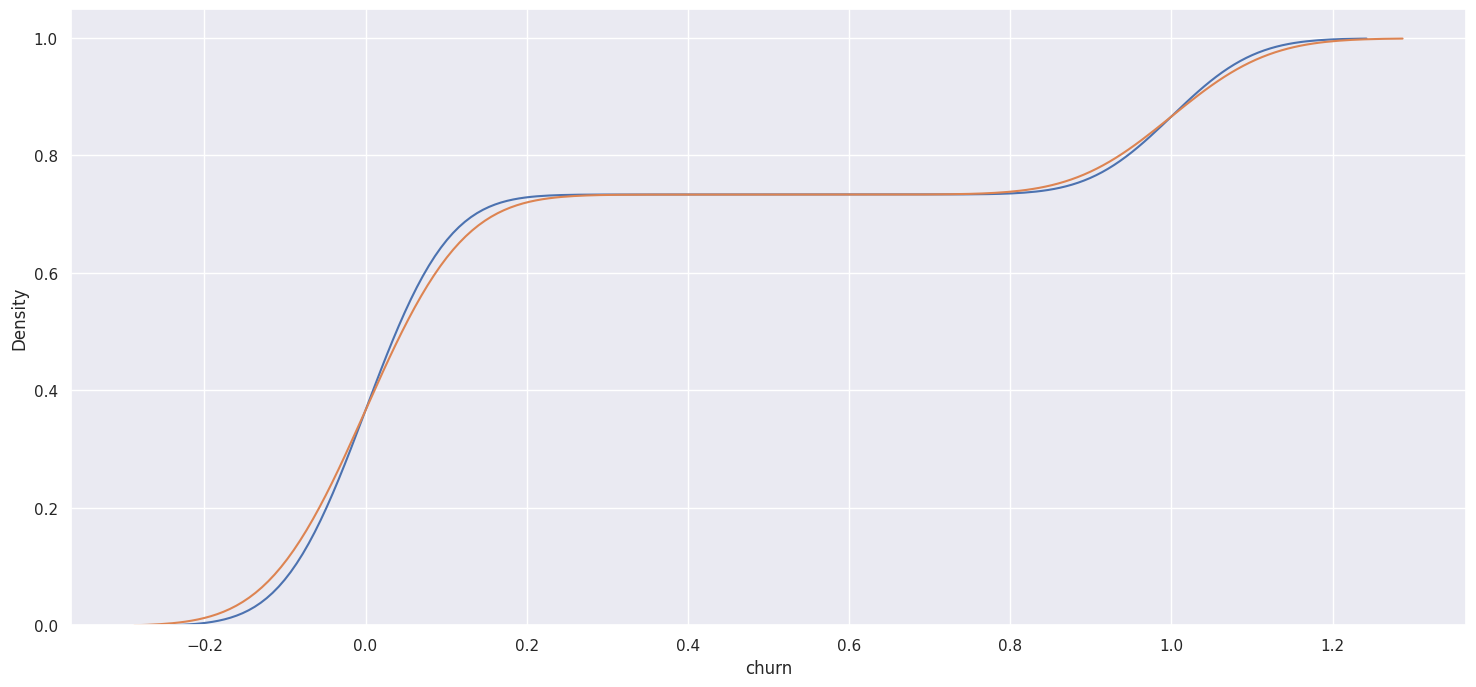

In [387]:
sns.kdeplot(y_train,cumulative=True)
sns.kdeplot(y_test,cumulative=True) 

In [388]:
df_ob.columns

Index(['customer_id', 'gender', 'senior_citizen', 'partner', 'dependents',
       'tenure', 'phone_service', 'paperless_billing', 'monthly_charges',
       'total_charges', 'churn', 'multiple_lines_No',
       'multiple_lines_No_service', 'multiple_lines_Yes',
       'internet_service_DSL', 'internet_service_Fiber_optic',
       'internet_service_No', 'online_security_No',
       'online_security_No_service', 'online_security_Yes', 'online_backup_No',
       'online_backup_No_service', 'online_backup_Yes', 'device_protection_No',
       'device_protection_No_service', 'device_protection_Yes',
       'tech_support_No', 'tech_support_No_service', 'tech_support_Yes',
       'streaming_tv_No', 'streaming_tv_No_service', 'streaming_tv_Yes',
       'streaming_movies_No', 'streaming_movies_No_service',
       'streaming_movies_Yes', 'contract_Month_to_month', 'contract_One_year',
       'contract_Two_year', 'payment_method_Bank_transfer__automatic_',
       'payment_method_Credit_card__automa

Стандартизируем выборки и проверим успешность стандартизации: среднее значение должно равняться (или почти равняться) нулю, стандартное отлонение должно равняться (или почти равняться) 1. Проверку проведём на случайном столбце, пусть это будет нулевой.

In [389]:
n = 2
scaler = StandardScaler()
X_train_st = scaler.fit_transform(X_train)
X_test_st = scaler.transform(X_test)       
print('Mean for standartized train:', np.mean(X_train_st[:,n]))
print('Std for standartized train:', np.std(X_train_st[:,n]))
print()
print('Mean for standartized test:', np.mean(X_test_st[:,n]))
print('Std for standartized test:', np.std(X_test_st[:,n]))

Mean for standartized train: -5.63006231098007e-17
Std for standartized train: 0.9999999999999998

Mean for standartized test: -0.019093005343484255
Std for standartized test: 0.9992586219407434


In [390]:
#Успешно.

##3.2 Обучение модели методом логистической регрессии

In [391]:
lr_model = LogisticRegression(solver='liblinear') # "solver='liblinear'" чтобы не было предупреждения
lr_model.fit(X_train_st, y_train)
lr_predictions = lr_model.predict(X_test_st)
lr_probabilities = lr_model.predict_proba(X_test_st)[:, 1] # берём только вторые числа из вектора пар вероятностей

Проверим какие веса получили признаки (мы запланировали это, когда не стали сразу удалять столбцы из-за высокой корреляции).

Нас интересуют

*   Есть сильная корреляция (0,83) между столбцами tenure и total_charges бсолютно логично- чем больше клиент находится с компанией - тем больше общая 
сумма которую он заплатил за услуги компании
*   dependns и partner (0.45) логично у кто в браке у того есть дети в данном случае у 45 процентов людей в этой выборке которые в браке у них есть дети
*   monthly_charges и total_charges (0,65) понятно- что платеж за месяц просто умножается на количество месяцев проведенных с компанией

In [392]:
list_columns = list(df_ob.columns.drop(['churn', 'customer_id']))
list_coef = list(chain.from_iterable(lr_model.coef_))
columns_coef = pd.DataFrame({'coef': list_coef, 'columns': list_columns})

columns_coef

,coef,columns
0,-0.000565,gender
1,0.063356,senior_citizen
2,0.011174,partner
3,-0.122064,dependents
4,-1.437001,tenure
5,0.021093,phone_service
6,0.158916,paperless_billing
7,-0.821485,monthly_charges
8,0.725963,total_charges
9,-0.106600,multiple_lines_No


In [393]:
_clear = list(columns_coef.drop([2,7,8,9,10,12,14,16,17,
                        18,20,21,23,25,26,27,28,
                        30,31,33,34,36,37,39], axis=0)['columns'])
X_clear = df_ob[_clear]
X_train, X_test, y_train, y_test = train_test_split(X_clear, y, test_size=0.3, random_state=42)

In [394]:
scaler = StandardScaler()
X_train_st = scaler.fit_transform(X_train)
X_test_st = scaler.transform(X_test)        
print('Mean for standartized train:', np.mean(X_train_st[:,0]))
print('Std for standartized train:', np.std(X_train_st[:,0]))
print()
print('Mean for standartized test:', np.mean(X_test_st[:,0]))
print('Std for standartized test:', np.std(X_test_st[:,0]))

Mean for standartized train: 5.088710165693525e-17
Std for standartized train: 1.0000000000000002

Mean for standartized test: 0.04050270058032339
Std for standartized test: 1.0000522311860542


In [395]:
lr_model = LogisticRegression(solver='liblinear') # "solver='liblinear'" чтобы не было предупреждения
lr_model.fit(X_train_st, y_train)
lr_predictions = lr_model.predict(X_test_st)
lr_probabilities = lr_model.predict_proba(X_test_st)[:, 1] # берём только вторые числа из вектора пар вероятностей

In [396]:
list_columns = _clear
list_coef = list(chain.from_iterable(lr_model.coef_))
columns_coef = pd.DataFrame({'coef': list_coef, 'columns': list_columns})
columns_coef

,coef,columns
0,0.010263,gender
1,0.103314,senior_citizen
2,-0.109614,dependents
3,-1.006011,tenure
4,-0.127993,phone_service
5,0.114040,paperless_billing
6,0.146587,multiple_lines_Yes
7,0.506219,internet_service_Fiber_optic
8,0.202491,online_security_No
9,-0.019385,online_backup_No_service


###Провели переобучение модели и удалили часть фичей
Удаление происходило по принципу - если категориальная фича раскладывалась на 2 или более колонок и в ней имелись коэффициенты разного знака то оставлялся один максимальный по модулю признак

##3.3 Метрики качества модели

Метрика accuracy (точность) - доля верно угаданных ответов. Работает только при условии баланса классов — когда объектов каждого класса примерно поровну. В нашем случае доля churn = 0 должная быть равна доле churn = 1. Посмотрим, что у нас с балансом.

In [397]:
print('Доля "churn = 1" в обучающей выборке:', y_train.mean())
print('Доля "churn = 1" в валидационной выборке:', y_test.mean())
print('Доли обучающей и валидационной выборке отличаются на :', y_train.mean() - y_test.mean())

Доля "churn = 1" в обучающей выборке: 0.2657456318569687
Доля "churn = 1" в валидационной выборке: 0.26587677725118486
Доли обучающей и валидационной выборке отличаются на : -0.0001311453942161589


*   Метрика precision (ещё одна точность) - доля правильных ответов только среди целевого класса (churn = 1). В нашем случае эта метрика будет особо важна, например, если, доверяя прогнозу о том, что конкретный клиент скоро уйдёт в отток, фитнес-клуб постарается уговорить клиента остаться каким-то способом, который будет стоить денег финтнес-клубу. Нелогично одаривать тех, кто и так не собирается уходить.

*   Метрика recall (полнота) - доля обнаруженных реальных объектов целевого класса. Эта метрика полезна, если бизнесу выгоднее предпринять какие-то меры для уменьшения оттока, пусть даже покрывая тех, кто не собирался уходить, чем этого не сделать.

*   Метрика F1-score (F1-мера) - сводная метрика, учитывающая баланс между точностью и полнотой, которые противоположны по сути. Вычисляется по формуле f1_score = 2 * precision * recall / (precision + recall). Посчитаем её тоже, она ещё пригодится при подборе порога определения бинарных классов.

*   Метрика roc_auc (площадь под кривой ошибок) - показывает, насколько хорошо выделяются классы, если отсортировать объекты по вероятности, которую спрогнозировала модель. Метрика хорошо подходит даже для несбалансированных классов. Если метрика достаточно высокая, значит можно подобрать такой порог, чтобы выросли другие метрики. Под порогом понимается граница между вероятностями отнесения к тому или иному классу. Если метрика недостаточно высокая, можно попробовать обучить модель каким-нибудь другим методом.

In [398]:
print('Метрики для модели логистической регрессии:')
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, lr_predictions)))
print('Precision: {:.2f}'.format(precision_score(y_test, lr_predictions)))
print('Recall: {:.2f}'.format(recall_score(y_test, lr_predictions)))
print('F1: {:.2f}'.format(f1_score(y_test, lr_predictions)))
print('roc_auc: {:.2f}'.format(roc_auc_score(y_test, lr_probabilities)))

Метрики для модели логистической регрессии:
Accuracy: 0.80
Precision: 0.66
Recall: 0.52
F1: 0.58
roc_auc: 0.84


##3.4 Обучение модели методом случайного леса.

Обучим модель методом случайного леса. Методом подбора найдём выгодное число деревьев (n_estimators).

In [399]:
def print_all_metrics(y_true, y_pred, title='Метрики классификации'):
    print(title)
    print('Accuracy: {:.2f}'.format(accuracy_score(y_true, y_pred)))
    print('Precision: {:.2f}'.format(precision_score(y_true, y_pred)))
    print('Recall: {:.2f}'.format(recall_score(y_true, y_pred)))
    print('F1: {:.2f}'.format(f1_score(y_true, y_pred)))
    print('roc_auc: {:.2f}'.format(roc_auc_score(y_true, y_pred)))
        
rf_model = RandomForestClassifier(n_estimators = 50, random_state = 42) 
rf_model.fit(X_train_st, y_train)
rf_predictions = rf_model.predict(X_test_st)
rf_probabilities = rf_model.predict_proba(X_test_st)[:, 1]

print_all_metrics(y_test, rf_predictions, title='Метрики для модели случайного леса:')

Метрики для модели случайного леса:
Accuracy: 0.78
Precision: 0.60
Recall: 0.50
F1: 0.54
roc_auc: 0.69


##3.5 Подбор порога

Подберём порог для определения бинарных классов для модели, обучавшейся методом логистической регрессии. Ориентироваться будем на метрику F1-score, как учитывающую и precision, и recall. Если и когда будет принято решение относительно тактики уменьшения оттока, порог можно будет подобрать заново.

In [400]:
import math
 
def f( x ):
    # получаем предказания
    # сохраняем вероятности только для положительного исхода
    probabilities = lr_model.predict_proba(X_test_st)[:, 1]
    custom_predictions = [0 if i < x else 1 for i in probabilities]
    res = sum([1,21])
    return (1- f1_score(y_test, custom_predictions))

def dihotomia( a = 0, b = 0, eps = 0.00001 ):
    t = lambda x: 1 if x > 0 else -1 if x < 0 else 0
    ksi = ( a + b ) / 2.0
    if ( math.fabs( f(a) - f(b) ) <= eps/2 ) or ( math.fabs( f(ksi) ) <= eps ):
        return ksi
    if ( f( a )*f( ksi ) <= 0.0 ):
        return dihotomia( a, ksi, eps )
    else:
        return dihotomia( ksi, b, eps )

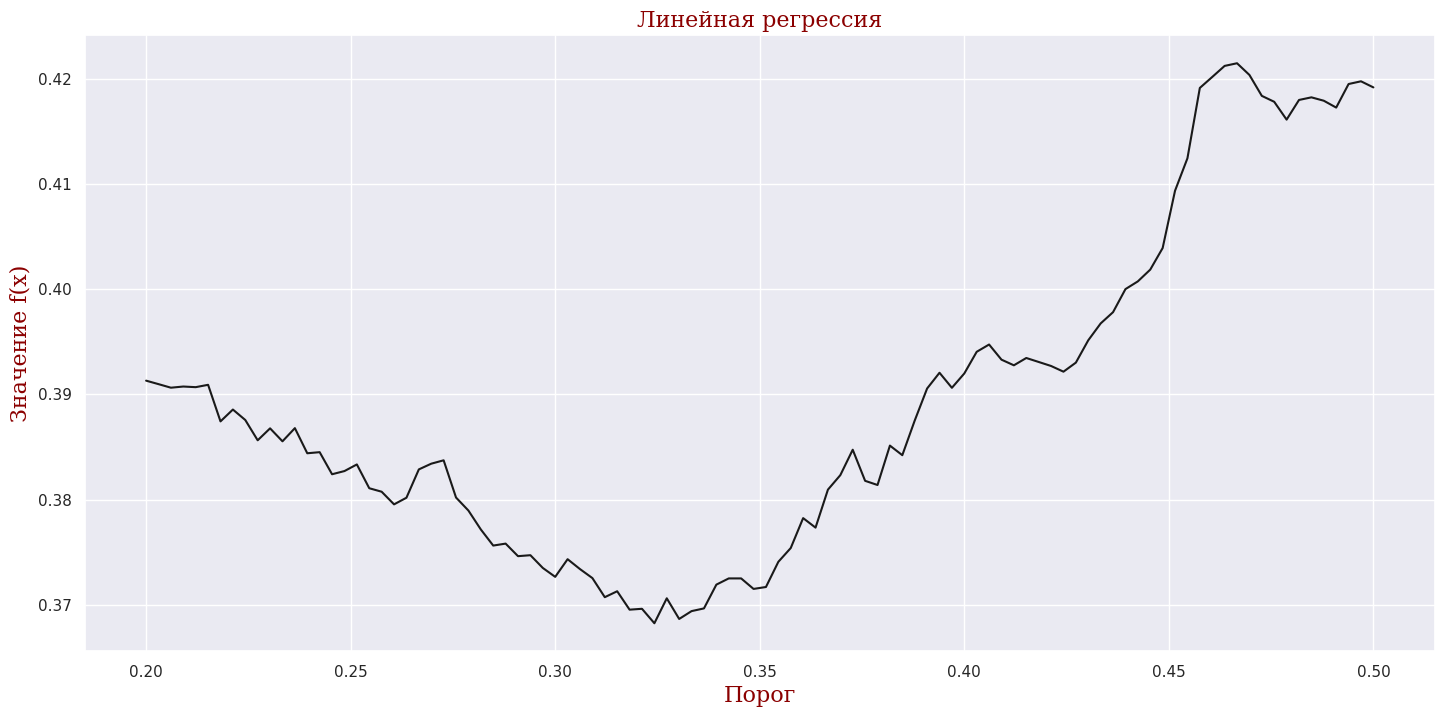

In [401]:
font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        }

x = np.linspace(0.2, 0.5, 100)
y = [f( _ ) for _ in x]

plt.plot(x, y, 'k')
plt.title('Линейная регрессия', fontdict=font)
plt.xlabel('Порог', fontdict=font)
plt.ylabel('Значение f(x)', fontdict=font)

# Tweak spacing to prevent clipping of ylabel
plt.subplots_adjust(left=0.15)
plt.show()

In [402]:
a = 0.30
b = 0.35
eps = 0.01
print( dihotomia( a, b, eps=eps ) )

0.32499999999999996


In [403]:
probabilities = lr_model.predict_proba(X_test_st)[:, 1]
threshold = 0.3245
custom_predictions = [0 if i < threshold else 1 for i in probabilities]

In [404]:
print('Метрики для прогноза линейной модели с кастомным порогом:')
print('Accuracy for custom: {:.2f}'.format(accuracy_score(y_test, custom_predictions)))
print('Precision for custom: {:.2f}'.format(precision_score(y_test, custom_predictions)))
print('Recall for custom: {:.2f}'.format(recall_score(y_test, custom_predictions)))
print('F1 for custom: {:.2f}'.format(f1_score(y_test, custom_predictions)))
print('roc_auc: {:.2f}'.format(roc_auc_score(y_test, custom_predictions)))

Метрики для прогноза линейной модели с кастомным порогом:
Accuracy for custom: 0.77
Precision for custom: 0.56
Recall for custom: 0.73
F1 for custom: 0.63
roc_auc: 0.76


In [405]:
def f( x ):
    # получаем предказания
    # сохраняем вероятности только для положительного исхода
    probabilities = rf_model.predict_proba(X_test_st)[:, 1]
    custom_predictions = [0 if i < x else 1 for i in probabilities]
    return (1- f1_score(y_test, custom_predictions))

def dihotomia( a = 0, b = 0, eps = 0.00001 ):
    t = lambda x: 1 if x > 0 else -1 if x < 0 else 0
    ksi = ( a + b ) / 2.0
    if ( math.fabs( f(a) - f(b) ) <= eps/2 ) or ( math.fabs( f(ksi) ) <= eps ):
        return ksi
    if ( f( a )*f( ksi ) <= 0.0 ):
        return dihotomia( a, ksi, eps )
    else:
        return dihotomia( ksi, b, eps )

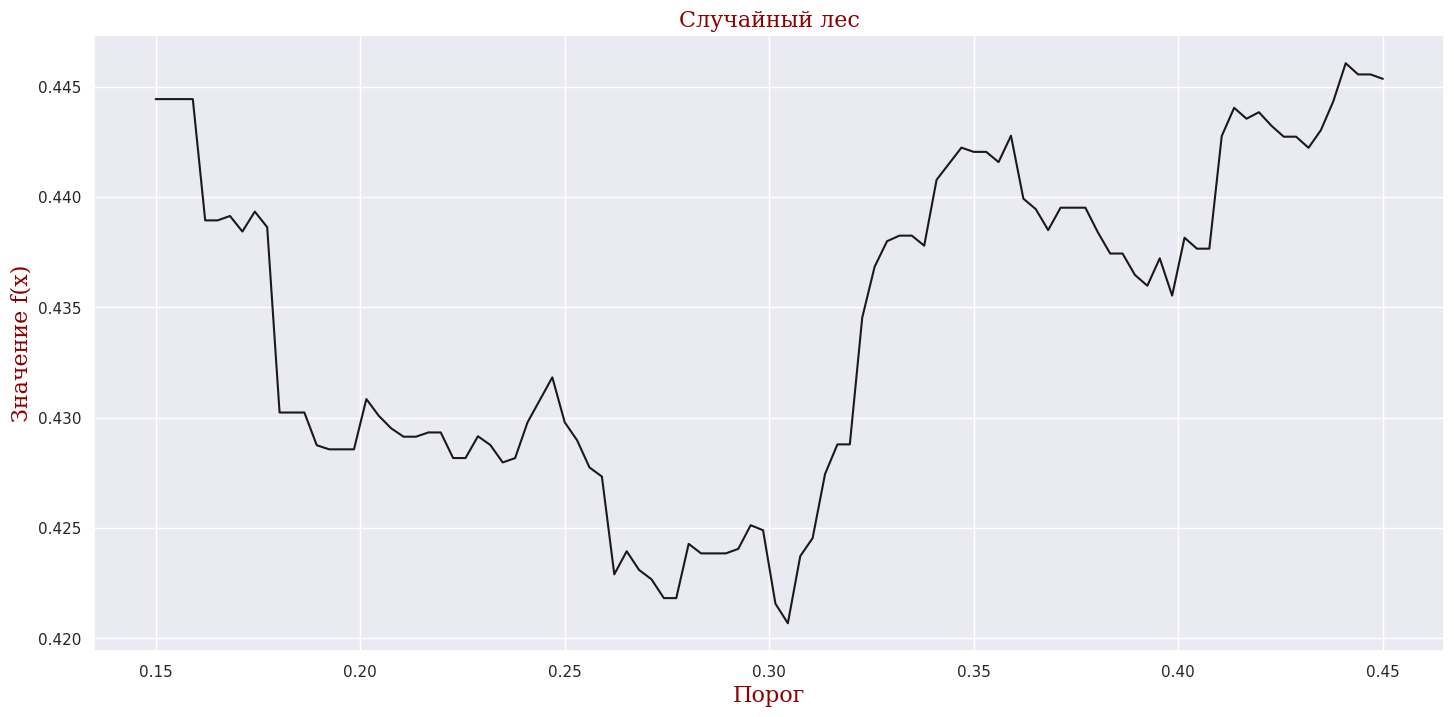

In [406]:
font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        }

x = np.linspace(0.15, 0.45, 100)
y = [f( _ ) for _ in x]

plt.plot(x, y, 'k')
plt.title('Cлучайный лес', fontdict=font)
plt.xlabel('Порог', fontdict=font)
plt.ylabel('Значение f(x)', fontdict=font)

# Tweak spacing to prevent clipping of ylabel
plt.subplots_adjust(left=0.15)
plt.show()

In [407]:
a = 0.30
b = 0.35
eps = 0.01
print( dihotomia( a, b, eps=eps ) )

0.34375


In [408]:
def print_all_metrics(y_true, y_pred, title='Метрики классификации'):
    print(title)
    print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred)))
    print('Precision: {:.2f}'.format(precision_score(y_test, y_pred)))
    print('Recall: {:.2f}'.format(recall_score(y_test, y_pred)))
    print('F1: {:.2f}'.format(f1_score(y_test, y_pred)))
    print('roc_auc: {:.2f}'.format(roc_auc_score(y_test, y_pred)))
        
rf_model = RandomForestClassifier(n_estimators = 50, random_state = 42) 
rf_model.fit(X_train_st, y_train)
rf_predictions = rf_model.predict(X_test_st)
rf_probabilities = rf_model.predict_proba(X_test_st)[:, 1]

threshold = 0.34375
rf_probabilities = rf_model.predict_proba(X_test_st)[:, 1]
custom_predictions = [0 if i < threshold else 1 for i in rf_probabilities]
print_all_metrics(y_test, custom_predictions, title='Метрики для модели случайного леса:')

Метрики для модели случайного леса:
Accuracy: 0.75
Precision: 0.52
Recall: 0.60
F1: 0.56
roc_auc: 0.70


###Результаты подбора порога для разных моделей

Метрики для прогноза линейной модели с кастомным порогом:

*   Accuracy for custom: 0.77
*   Precision for custom: 0.56
*   Recall for custom: 0.73
*   F1 for custom: 0.63
*   roc_auc: 0.76

Метрики для модели случайного леса:
*   Accuracy: 0.75
*   Precision: 0.52
*   Recall: 0.60
*   F1: 0.56
*   roc_auc: 0.70

#Пункт 4.Кластеризация клиентов

##4.1 Кластеризация и дендрограмма

In [409]:
df_clast = df_ob.drop(['churn', 'customer_id'], axis=1)

In [410]:
X_sc = scaler.fit_transform(df_clast)

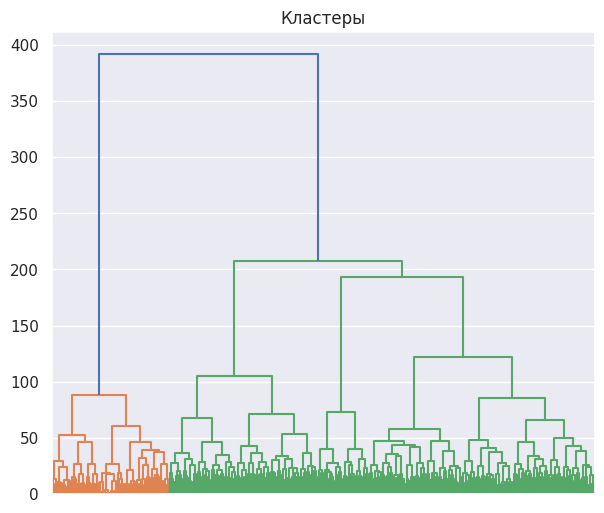

In [411]:
linked = linkage(X_sc, method = 'ward') 
plt.figure(figsize=(7, 6))  
dendrogram(linked, orientation='top', no_labels=True)
plt.title('Кластеры')
plt.show() 

Датасет разделился на 2 кластера что верно, но не очень ожидаемо

In [412]:
km = KMeans(n_clusters=2, random_state=42)
labels = km.fit_predict(X_sc)
df_ob['cluster'] = labels
silhouette_score(X_sc, labels)

0.2986208919209993

Метрика силуэта получилась, мягко говоря, так себе (0.298 при теоретически идеальной равной 1). Поэтому не стоит ожидать от кластеризации многого. Глянем, как распределилсь кластеры.

In [413]:
df_ob['cluster'].value_counts()

0    5512
1    1520
Name: cluster, dtype: int64

Сгруппируем данные по кластерам, посчитаем средние значения для всех столбцов и отсортируем по возрастанию оттока.

In [414]:
_clear

['gender',
 'senior_citizen',
 'dependents',
 'tenure',
 'phone_service',
 'paperless_billing',
 'multiple_lines_Yes',
 'internet_service_Fiber_optic',
 'online_security_No',
 'online_backup_No_service',
 'device_protection_No_service',
 'tech_support_No',
 'streaming_tv_Yes',
 'streaming_movies_Yes',
 'contract_Two_year',
 'payment_method_Electronic_check']

In [415]:
claster_data = list(_clear).copy()
claster_data.append('cluster')
claster_data.append('churn')
claster_data

['gender',
 'senior_citizen',
 'dependents',
 'tenure',
 'phone_service',
 'paperless_billing',
 'multiple_lines_Yes',
 'internet_service_Fiber_optic',
 'online_security_No',
 'online_backup_No_service',
 'device_protection_No_service',
 'tech_support_No',
 'streaming_tv_Yes',
 'streaming_movies_Yes',
 'contract_Two_year',
 'payment_method_Electronic_check',
 'cluster',
 'churn']

In [416]:
t = df_ob[claster_data].groupby('cluster').mean().sort_values(by='churn').reset_index()
t

,cluster,gender,senior_citizen,dependents,tenure,phone_service,paperless_billing,multiple_lines_Yes,internet_service_Fiber_optic,online_security_No,online_backup_No_service,device_protection_No_service,tech_support_No,streaming_tv_Yes,streaming_movies_Yes,contract_Two_year,payment_method_Electronic_check,churn
0,1,0.490789,0.034211,0.419079,30.667763,1.000000,0.292763,0.223684,0.000000,0.000000,1.0,1.0,0.000000,0.000000,0.000000,0.416447,0.080263,0.074342
1,0,0.496553,0.197750,0.265239,32.905479,0.876633,0.675435,0.476597,0.561684,0.634434,0.0,0.0,0.629898,0.490385,0.495464,0.190856,0.406930,0.318578


In [417]:
t.columns

Index(['cluster', 'gender', 'senior_citizen', 'dependents', 'tenure',
       'phone_service', 'paperless_billing', 'multiple_lines_Yes',
       'internet_service_Fiber_optic', 'online_security_No',
       'online_backup_No_service', 'device_protection_No_service',
       'tech_support_No', 'streaming_tv_Yes', 'streaming_movies_Yes',
       'contract_Two_year', 'payment_method_Electronic_check', 'churn'],
      dtype='object')

In [418]:
t[['cluster','phone_service','internet_service_Fiber_optic', 'online_security_No',
       'online_backup_No_service', 'device_protection_No_service',
       'tech_support_No', 'streaming_tv_Yes', 'streaming_movies_Yes']]

,cluster,phone_service,internet_service_Fiber_optic,online_security_No,online_backup_No_service,device_protection_No_service,tech_support_No,streaming_tv_Yes,streaming_movies_Yes
0,1,1.000000,0.000000,0.000000,1.0,1.0,0.000000,0.000000,0.000000
1,0,0.876633,0.561684,0.634434,0.0,0.0,0.629898,0.490385,0.495464


In [419]:
# 'cluster','phone_service','internet_service_Fiber_optic', 'online_security_No',
#        'online_backup_No_service', 'device_protection_No_service',
#        'tech_support_No', 'streaming_tv_Yes', 'streaming_movies_Yes'

##4.2 Гистограммы

In [420]:
# for col in df_ob.drop(['cluster'], axis=1).columns:
#     i = 1
#     for value in [0, 1]:
#         ax = plt.subplot(141)
#         plt.subplot(i, 4, value+1, sharex=ax, sharey=ax)
#         plt.suptitle('\nРаспределение по признаку {}'.format(col))
#         plt.hist(df_ob.loc[df_ob['cluster'] == value, col], bins=20)
#         plt.title('Кластер {}'.format(value))        
#     plt.show()
#     i = i+1

Всё ещё сложно выделить какие-то явные принципы, по которым сформировались кластеры. И это совсем неудивительно с получившейся низкой метрикой силуэта, равной 0.298.

#Пункт 5.Анализ выживаемости для прогнозирования оттока

In [421]:
!pip install lifelines

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [422]:
from lifelines.plotting import plot_lifetimes      # Lifeline package for the Survival Analysis
from lifelines import KaplanMeierFitter
plt.style.use('default')

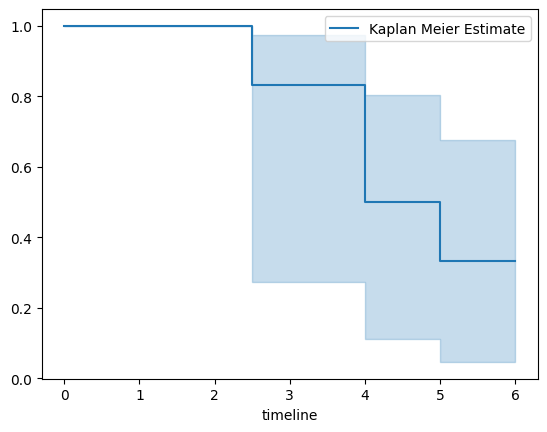

In [423]:
durations = [5,6,6,2.5,4,4]
event_observed = [1, 0, 0, 1, 1, 1]

kmf = KaplanMeierFitter() 

kmf.fit(durations, event_observed,label='Kaplan Meier Estimate')

kmf.plot();

In [424]:
kmf_data = claster_data.copy()
'tenure' in kmf_data

True

In [425]:
df_ob[kmf_data].isna().mean().sort_values(ascending=False)

gender                             0.0
senior_citizen                     0.0
cluster                            0.0
payment_method_Electronic_check    0.0
contract_Two_year                  0.0
streaming_movies_Yes               0.0
streaming_tv_Yes                   0.0
tech_support_No                    0.0
device_protection_No_service       0.0
online_backup_No_service           0.0
online_security_No                 0.0
internet_service_Fiber_optic       0.0
multiple_lines_Yes                 0.0
paperless_billing                  0.0
phone_service                      0.0
tenure                             0.0
dependents                         0.0
churn                              0.0
dtype: float64

In [426]:
durations = list(df_ob[kmf_data]['tenure']) ## Время пребывания 
event_observed = list(df_ob[kmf_data]['churn'])  ## Отток

print(durations[:5])
print(event_observed[:5])

[1, 34, 2, 45, 2]
[0, 0, 1, 0, 1]


<AxesSubplot:xlabel='timeline'>

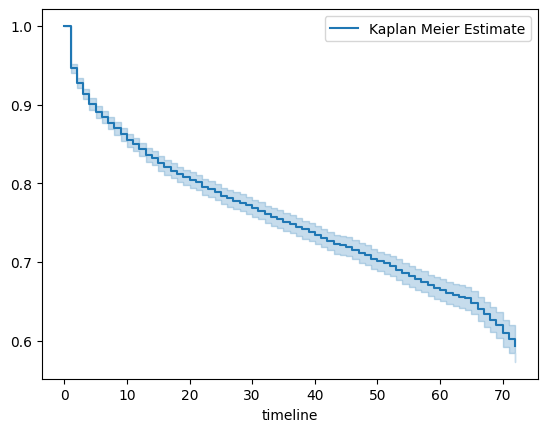

In [427]:
km = KaplanMeierFitter()
km.fit(durations, event_observed,label='Kaplan Meier Estimate')

km.plot()

<AxesSubplot:xlabel='timeline'>

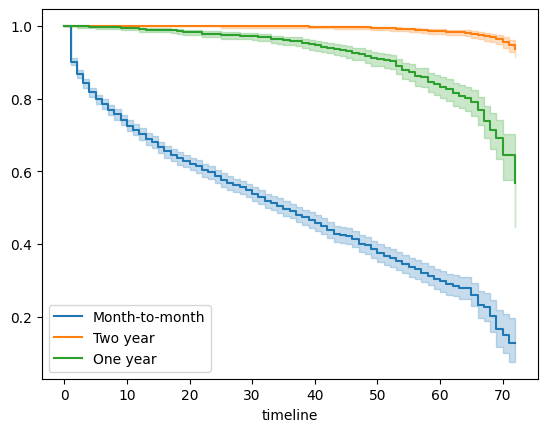

In [428]:
kmf = KaplanMeierFitter() 

T = df['tenure']
E = df['churn']

groups = df['contract']
ix1 = (groups == 'Month-to-month')
ix2 = (groups == 'Two year')
ix3 = (groups == 'One year')

kmf.fit(T[ix1], E[ix1], label='Month-to-month')
ax = kmf.plot()

kmf.fit(T[ix2], E[ix2], label='Two year')
ax1 = kmf.plot(ax=ax)

kmf.fit(T[ix3], E[ix3], label='One year')
kmf.plot(ax=ax1)

<AxesSubplot:xlabel='timeline'>

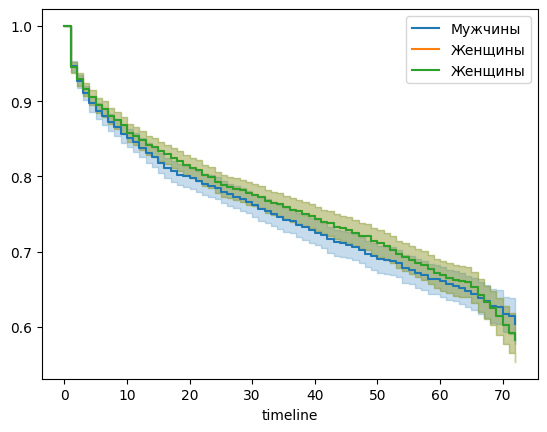

In [429]:
kmf = KaplanMeierFitter() 

T = df['tenure']
E = df['churn']

groups = df['gender']
ix1 = (groups == 1)
ix2 = (groups == 0)

kmf.fit(T[ix1], E[ix1], label='Мужчины')
ax = kmf.plot()

kmf.fit(T[ix2], E[ix2], label='Женщины')
ax1 = kmf.plot(ax=ax)

kmf.plot(ax=ax1)

In [464]:
df.columns

Index(['customer_id', 'gender', 'senior_citizen', 'partner', 'dependents',
       'tenure', 'phone_service', 'multiple_lines', 'internet_service',
       'online_security', 'online_backup', 'device_protection', 'tech_support',
       'streaming_tv', 'streaming_movies', 'contract', 'paperless_billing',
       'payment_method', 'monthly_charges', 'total_charges', 'churn'],
      dtype='object')

In [472]:
df['multiple_lines'].head(15)

0     No_service
1             No
2             No
3     No_service
4             No
5            Yes
6            Yes
7     No_service
8            Yes
9             No
10            No
11            No
12           Yes
13           Yes
14            No
Name: multiple_lines, dtype: object

In [507]:
list_columns = ['tenure','churn','gender','partner','dependents','phone_service',
                'monthly_charges', 'senior_citizen','streaming_tv']

df_r = df[list_columns].copy()

df_dummy = pd.get_dummies(df_r, drop_first=True)
df_dummy.head()
df_dummy.columns

Index(['tenure', 'churn', 'gender', 'partner', 'dependents', 'phone_service',
       'monthly_charges', 'senior_citizen', 'streaming_tv_No_service',
       'streaming_tv_Yes'],
      dtype='object')

In [508]:
print('churn' in df_dummy.columns)
print('tenure' in df_dummy.columns)
print('customer_id' in df_dummy.columns)

True
True
False


In [509]:
cph = CoxPHFitter()
cph.fit(df_dummy, 'tenure', event_col='churn')
cph.print_summary()

<lifelines.CoxPHFitter: fitted with 7032 total observations, 5163 right-censored observations>
             duration col = 'tenure'
                event col = 'churn'
      baseline estimation = breslow
   number of observations = 7032
number of events observed = 1869
   partial log-likelihood = -15182.39
         time fit was run = 2022-11-10 14:05:39 UTC

---
                          coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                       
gender                    0.01       1.01       0.05            -0.08             0.10                 0.92                 1.11
partner                  -0.81       0.45       0.05            -0.92            -0.70                 0.40                 0.50
dependents               -0.36       0.70       0.07            -0.49            -0.22                 0.61                 0.80
phone_service             0.69       2.00       0.10             0.49             0.90                 1.63                 2.45
monthly_charges          -0.01       0.99       0.00            -0.01            -0.01                 0.99                 0.99
senior_citizen            0.40       1.49       0.06             0.29             0.50                 1.33                 1.66
streaming_tv_No_service  -2.10       0.12       0.13            -2.36            -1.84                 0.09                 0.16
streaming_tv_Yes         -0.19       0.83       0.06            -0.31            -0.07                 0.73                 0.93

                          cmp to      z      p   -log2(p)
covariate                                                
gender                      0.00   0.23   0.82       0.29
partner                     0.00 -14.93 <0.005     164.98
dependents                  0.00  -5.21 <0.005      22.37
phone_service               0.00   6.65 <0.005      34.96
monthly_charges             0.00  -6.13 <0.005      30.06
senior_citizen              0.00   7.16 <0.005      40.15
streaming_tv_No_service     0.00 -15.79 <0.005     184.09
streaming_tv_Yes            0.00  -3.10 <0.005       9.03
---
Concordance = 0.71
Partial AIC = 30380.78
log-likelihood ratio test = 941.30 on 8 df
-log2(p) of ll-ratio test = 654.95

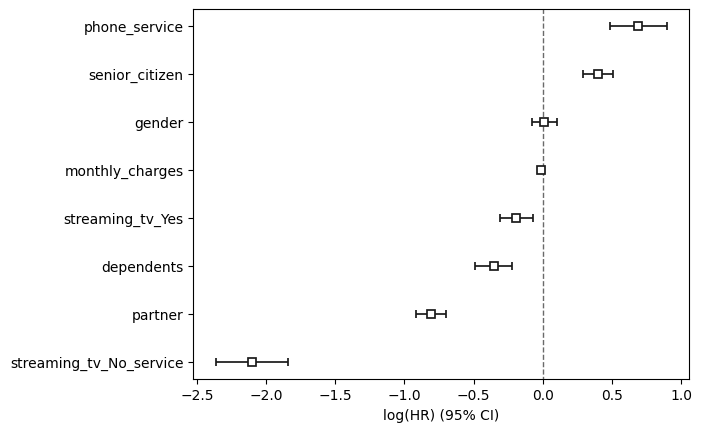

In [510]:
cph.plot();

Опишем то, что увидели
*   phone_service  при наличии у клиента сервиса отток становится вероятнее
*   streaming_tv_No_service почти всегда означает что клиент останется

In [520]:
tr_rows = df_dummy.iloc[2:8, :]
tr_rows

,tenure,churn,gender,partner,dependents,phone_service,monthly_charges,senior_citizen,streaming_tv_No_service,streaming_tv_Yes
2,2,1,0,0,0,1,53.85,0,0,0
3,45,0,0,0,0,0,42.30,0,0,0
4,2,1,1,0,0,1,70.70,0,0,0
5,8,1,1,0,0,1,99.65,0,0,1
6,22,0,0,0,1,1,89.10,0,0,1
7,10,0,1,0,0,0,29.75,0,0,0


<AxesSubplot:>

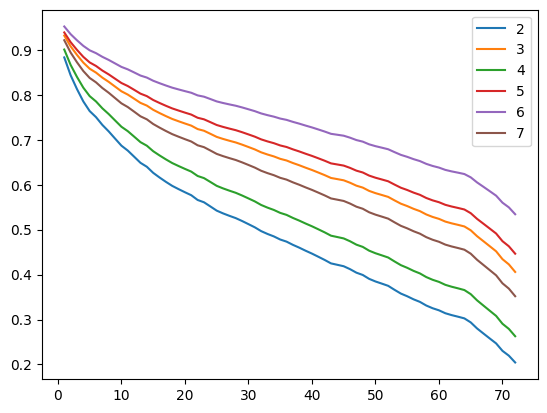

In [521]:
cph.predict_survival_function(tr_rows).plot()

#Шаг 5. Выводы и рекомендации

Исследовательский анализ данных

*   Клиенты у которых метод оплаты "Electronic check" склонны к оттоку
*   phone_service  при наличии у клиента сервиса отток становится вероятнее (он есть у большинства клиентов в принципе)

Меньше отток среди тех, кто:

*   SeniorCitizen: клиент пожилой гражданин
*   Partner: есть ли у клиента партнер (да, нет)
*   PaperlessBilling: клиент имеет безбумажный биллинг
*   MonthlyCharges: клиенты заплатившие больше
*   InternetService: без оптоволокна
*   OnlineSecurity: если у клиента есть защита данных он уходит реже
*   OnlineBackup: если у клиента есть онлайн-резервное копирование он уходит реже
*   DeviceProtection: если у клиента есть защита устройства он уходит реже
*   TechSupport: если у клиента есть техническая поддержка он уходит реже
*   streaming_tv_No_service: почти всегда означает что клиент останется

*   StreamingMovies: уходит чуть чуть реже (если есть фильмы то и телевидение есть)
*   Contract: те к кого длительные контракты тот меньше уходит или что вероятней при сроке контракта клиенту не выгодно уходить до истечения сроке
*   TotalCharges: клиент уже много заплатил компании
*   Tenure: заплатил больше
*   MonthlyCharges: всплеск соотношения отточных клиентов в цене 80
*   TotalCharges: заплатил больше

Корреляции
*   Есть сильная корреляция (0,83) между столбцами tenure и total_charges бсолютно логично- чем больше клиент находится с компанией - тем больше общая 
сумма которую он заплатил за услуги компании
*   dependns и partner (0.45) логично у кто в браке у того есть дети в данном случае у 45 процентов людей в этой выборке которые в браке у них есть дети
*   monthly_charges и total_charges (0,65) понятно- что платеж за месяц просто умножается на количество месяцев проведенных с компанией

Text(0.5, 1.0, 'Шкала зависимости fig признаков к отточности клинтов')

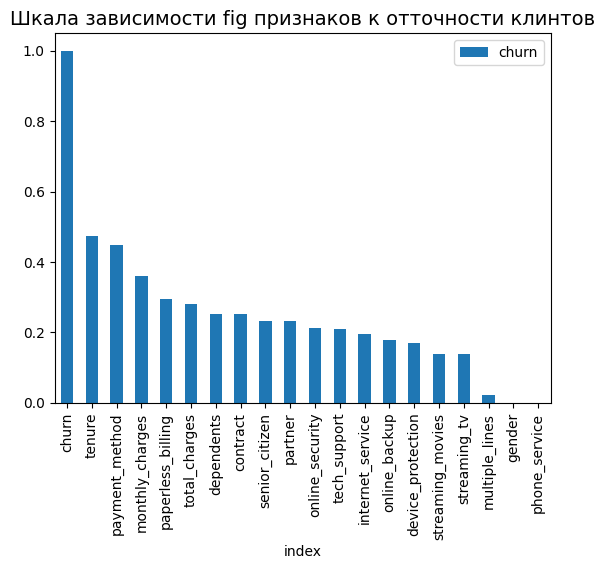

In [513]:
tt[1:].plot(x='index',y='churn',kind='bar').set_title('Шкала зависимости fig признаков к отточности клинтов', size=14)

Зависимость fig
*   Tenure: если месяцев мало то отток вероятнее
*   MonthlyCharges: всплеск соотношения отточных клиентов в цене 80
*   TotalCharges: Клиенты заплатившие больше оттекают реже
*   tenure - количество месяцев, в течение которых клиент оставался в компании
*   payment_method - способ оплаты клиента (электронный чек, чек по почте, автоматический банковский перевод, автоплатеж с карты)
*   monthly_charges - сумма, взимаемая с клиента ежемесячно
*   paperless_billing - есть ли у клиента безбумажный биллинг (да, нет)

#Рекомендации
Рекомендуются следующие меры:

*   поощрять клиентов в случае покупки различных доп услуг (защита данных, телефонного сервиса и тд);
*   внедрить абонементы на несколько месяцев 6 или 3 ;
*   Проверить работу оптоволоконных кабелей ;